In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [3]:
sns.__version__

'0.12.2'

In [4]:
df = pd.read_csv('CoffeeChain-SimplifiedData.csv')

In [5]:
# First five rows of the datat set.
df.head()

Product Id Product Type            Product     Type   Market Size   Market  \
0           1       Coffee           Amaretto  Regular  Major Market  Central   
1           2       Coffee          Columbian  Regular  Major Market  Central   
2           3       Coffee  Decaf Irish Cream    Decaf  Major Market  Central   
3          13          Tea          Green Tea  Regular  Major Market  Central   
4           5     Espresso        Caffe Mocha  Regular  Major Market  Central   

      State  Budget Sales  Budget Profit  Cogs  Profit  Sales  Total Expenses  \
0  Colorado           220            100    89      94    219              36   
1  Colorado           190             80    83      68    190              39   
2  Colorado           240            110    95     101    234              38   
3  Colorado            80             30    44      30    100              26   
4  Colorado           150             70    54      54    134              26   

            Date  
0  01/01/10 0:00  
1  01/01/10 0:00  
2  01/01/10 0:00  
3  01/01/10 0:00  
4  01/01/10 0:00

In [6]:
# Last five rows of the data set by default
df.tail()

Product Id Product Type            Product     Type   Market Size  \
4243           4     Espresso        Caffe Latte  Regular  Small Market   
4244           5     Espresso        Caffe Mocha  Regular  Small Market   
4245           6     Espresso     Decaf Espresso    Decaf  Small Market   
4246           2       Coffee          Columbian  Regular  Small Market   
4247           3       Coffee  Decaf Irish Cream    Decaf  Small Market   

     Market       State  Budget Sales  Budget Profit  Cogs  Profit  Sales  \
4243   West  Washington            50             20    24      19     60   
4244   West  Washington           140             30    65      34    155   
4245   West  Washington           170             60    80      76    188   
4246   West  Washington           200             80    72      86    188   
4247   West  Washington           290             50   105      30    266   

      Total Expenses           Date  
4243              19  01/12/11 0:00  
4244              57  01/12/11 0:00  
4245              45  01/12/11 0:00  
4246              46  01/12/11 0:00  
4247             125  01/12/11 0:00

In [7]:
# How many rows and columns?
df.shape

(4248, 14)

In [8]:
print('Shape of Coffee Chain Simplified Data is:', df.shape)

Shape of Coffee Chain Simplified Data is: (4248, 14)


In [9]:
# What columns do we have?
df.columns

Index(['Product Id', 'Product Type', 'Product', 'Type', 'Market Size',
       'Market', 'State', 'Budget Sales', 'Budget Profit', 'Cogs', 'Profit',
       'Sales', 'Total Expenses', 'Date'],
      dtype='object')

In [10]:
# Rename Type to Coffee Type
df.rename(columns = {'Type': 'Coffee Type'}, inplace = True)

In [11]:
df.rename(columns ={'Date': 'Date Time'}, inplace = True)

In [12]:
df.head()

Product Id Product Type            Product Coffee Type   Market Size  \
0           1       Coffee           Amaretto     Regular  Major Market   
1           2       Coffee          Columbian     Regular  Major Market   
2           3       Coffee  Decaf Irish Cream       Decaf  Major Market   
3          13          Tea          Green Tea     Regular  Major Market   
4           5     Espresso        Caffe Mocha     Regular  Major Market   

    Market     State  Budget Sales  Budget Profit  Cogs  Profit  Sales  \
0  Central  Colorado           220            100    89      94    219   
1  Central  Colorado           190             80    83      68    190   
2  Central  Colorado           240            110    95     101    234   
3  Central  Colorado            80             30    44      30    100   
4  Central  Colorado           150             70    54      54    134   

   Total Expenses      Date Time  
0              36  01/01/10 0:00  
1              39  01/01/10 0:00  
2              38  01/01/10 0:00  
3              26  01/01/10 0:00  
4              26  01/01/10 0:00

In [13]:
df['Product Category'] = df['Product'].replace({'Columbian': 2,'Caffe Mocha': 5, 'Lemon': 9, 'Decaf Espresso': 6, 'Decaf Irish Cream': 3, 'Chamomile': 8, 'Darjeeling': 11, 'Green Tea': 13, 'Earl Grey': 12, 'Caffe Latte': 4, 'Amaretto': 1, 'Mint': 10, 'Regular Espresso': 7}) 

In [14]:
df['Product Type Num'] = df['Product Type'].replace ({'Espresso': 0, 'Coffee': 1, 'Herbal Tea': 2, 'Tea': 3})

In [15]:
df['Type of Coffee'] = df['Coffee Type'].replace ({'Decaf': 0, 'Regular': 1})

In [16]:
df['Size of Market'] = df['Market Size'].replace({'Major Market': 1, 'Small Market': 0}) 

In [17]:
df['Market Location'] = df['Market'].replace({'Central': 0, 'South' : 1, 'East': 2, 'West': 3,})

In [18]:
df['States'] = df['State'].replace({'Utah': 0, 'California': 1, 'Colorado': 2, 'Nevada': 3, 'Washington': 4, 'Florida': 5, 'Illinois': 6, 'Wisconsin': 7, 'Ohio': 8, 'Missouri': 9, 'Iowa': 10, 'New York': 11, 'Connecticut': 12, 'New Hampshire': 13, 'Louisiana': 14, 'New Mexico' : 15, 'Oklahoma': 16, 'Texas': 17, 'Massachusetts': 18, 'Oregon': 19})             

In [19]:
df['State'].value_counts()

State
Utah             288
California       288
Colorado         264
Oregon           264
Nevada           264
Washington       240
Florida          216
Illinois         216
Wisconsin        216
Ohio             216
Missouri         216
Iowa             216
New York         192
Connecticut      168
New Hampshire    168
Louisiana        168
New Mexico       168
Oklahoma         168
Texas            168
Massachusetts    144
Name: count, dtype: int64

In [20]:
# Select the coffee type column
df['Coffee Type']

0       Regular
1       Regular
2         Decaf
3       Regular
4       Regular
         ...   
4243    Regular
4244    Regular
4245      Decaf
4246    Regular
4247      Decaf
Name: Coffee Type, Length: 4248, dtype: object

In [21]:
# Remove elipses to see all of data set
pd.set_option('display.max_rows',None)

In [22]:
# Index to see al rows and columns 
df.iloc[:, :]

Product Id Product Type            Product Coffee Type   Market Size  \
0              1       Coffee           Amaretto     Regular  Major Market   
1              2       Coffee          Columbian     Regular  Major Market   
2              3       Coffee  Decaf Irish Cream       Decaf  Major Market   
3             13          Tea          Green Tea     Regular  Major Market   
4              5     Espresso        Caffe Mocha     Regular  Major Market   
5              6     Espresso     Decaf Espresso       Decaf  Major Market   
6              8   Herbal Tea          Chamomile       Decaf  Major Market   
7              9   Herbal Tea              Lemon       Decaf  Major Market   
8             10   Herbal Tea               Mint       Decaf  Major Market   
9             11          Tea         Darjeeling     Regular  Major Market   
10            12          Tea          Earl Grey     Regular  Major Market   
11             2       Coffee          Columbian     Regular  Major Market   
12             3       Coffee  Decaf Irish Cream       Decaf  Major Market   
13             5     Espresso        Caffe Mocha     Regular  Major Market   
14             6     Espresso     Decaf Espresso       Decaf  Major Market   
15             8   Herbal Tea          Chamomile       Decaf  Major Market   
16             9   Herbal Tea              Lemon       Decaf  Major Market   
17            10   Herbal Tea               Mint       Decaf  Major Market   
18            11          Tea         Darjeeling     Regular  Major Market   
19            12          Tea          Earl Grey     Regular  Major Market   
20             1       Coffee           Amaretto     Regular  Small Market   
21             2       Coffee          Columbian     Regular  Small Market   
22             3       Coffee  Decaf Irish Cream       Decaf  Small Market   
23             5     Espresso        Caffe Mocha     Regular  Small Market   
24             6     Espresso     Decaf Espresso       Decaf  Small Market   
25             8   Herbal Tea          Chamomile       Decaf  Small Market   
26             9   Herbal Tea              Lemon       Decaf  Small Market   
27            11          Tea         Darjeeling     Regular  Small Market   
28            12          Tea          Earl Grey     Regular  Small Market   
29             2       Coffee          Columbian     Regular  Small Market   
30             3       Coffee  Decaf Irish Cream       Decaf  Small Market   
31            13          Tea          Green Tea     Regular  Small Market   
32             5     Espresso        Caffe Mocha     Regular  Small Market   
33             6     Espresso     Decaf Espresso       Decaf  Small Market   
34             8   Herbal Tea          Chamomile       Decaf  Small Market   
35             9   Herbal Tea              Lemon       Decaf  Small Market   
36            11          Tea         Darjeeling     Regular  Small Market   
37            12          Tea          Earl Grey     Regular  Small Market   
38             1       Coffee           Amaretto     Regular  Major Market   
39             2       Coffee          Columbian     Regular  Major Market   
40             3       Coffee  Decaf Irish Cream       Decaf  Major Market   
41            12          Tea          Earl Grey     Regular  Major Market   
42             6     Espresso     Decaf Espresso       Decaf  Major Market   
43             5     Espresso        Caffe Mocha     Regular  Major Market   
44             8   Herbal Tea          Chamomile       Decaf  Major Market   
45             9   Herbal Tea              Lemon       Decaf  Major Market   
46            11          Tea         Darjeeling     Regular  Major Market   
47             1       Coffee           Amaretto     Regular  Small Market   
48             2       Coffee          Columbian     Regular  Small Market   
49             3       Coffee  Decaf Irish Cream       Decaf  Small Market   
50            12          Te

In [23]:
# reset to show data set with elpises
pd.reset_option('display.max_rows')

In [24]:
df

Product Id Product Type            Product Coffee Type   Market Size  \
0              1       Coffee           Amaretto     Regular  Major Market   
1              2       Coffee          Columbian     Regular  Major Market   
2              3       Coffee  Decaf Irish Cream       Decaf  Major Market   
3             13          Tea          Green Tea     Regular  Major Market   
4              5     Espresso        Caffe Mocha     Regular  Major Market   
...          ...          ...                ...         ...           ...   
4243           4     Espresso        Caffe Latte     Regular  Small Market   
4244           5     Espresso        Caffe Mocha     Regular  Small Market   
4245           6     Espresso     Decaf Espresso       Decaf  Small Market   
4246           2       Coffee          Columbian     Regular  Small Market   
4247           3       Coffee  Decaf Irish Cream       Decaf  Small Market   

       Market       State  Budget Sales  Budget Profit  Cogs  Profit  Sales  \
0     Central    Colorado           220            100    89      94    219   
1     Central    Colorado           190             80    83      68    190   
2     Central    Colorado           240            110    95     101    234   
3     Central    Colorado            80             30    44      30    100   
4     Central    Colorado           150             70    54      54    134   
...       ...         ...           ...            ...   ...     ...    ...   
4243     West  Washington            50             20    24      19     60   
4244     West  Washington           140             30    65      34    155   
4245     West  Washington           170             60    80      76    188   
4246     West  Washington           200             80    72      86    188   
4247     West  Washington           290             50   105      30    266   

      Total Expenses      Date Time  Product Category  Product Type Num  \
0                 36  01/01/10 0:00                 1                 1   
1                 39  01/01/10 0:00                 2                 1   
2                 38  01/01/10 0:00                 3                 1   
3                 26  01/01/10 0:00                13                 3   
4                 26  01/01/10 0:00                 5                 0   
...              ...            ...               ...               ...   
4243              19  01/12/11 0:00                 4                 0   
4244              57  01/12/11 0:00                 5                 0   
4245              45  01/12/11 0:00                 6                 0   
4246              46  01/12/11 0:00                 2                 1   
4247             125  01/12/11 0:00                 3                 1   

      Type of Coffee  Size of Market  Market Location  States  
0                  1               1                0       2  
1                  1               1                0       2  
2                  0               1                0       2  
3                  1               1                0       2  
4                  1               1                0       2  
...              ...             ...              ...     ...  
4243               1               0                3       4  
4244               1               0                3       4  
4245               0               0                3       4  
4246               1               0                3       4  
4247               0               0                3       4  

[4248 rows x 20 columns]

In [25]:
# Lets see the first and last five  
df.iloc[:,3]

0       Regular
1       Regular
2         Decaf
3       Regular
4       Regular
         ...   
4243    Regular
4244    Regular
4245      Decaf
4246    Regular
4247      Decaf
Name: Coffee Type, Length: 4248, dtype: object

In [26]:
# This is the same as df.iloc
df['Coffee Type']

0       Regular
1       Regular
2         Decaf
3       Regular
4       Regular
         ...   
4243    Regular
4244    Regular
4245      Decaf
4246    Regular
4247      Decaf
Name: Coffee Type, Length: 4248, dtype: object

In [27]:
# The first three rows and columns
df.iloc[:3, :]

Product Id Product Type            Product Coffee Type   Market Size  \
0           1       Coffee           Amaretto     Regular  Major Market   
1           2       Coffee          Columbian     Regular  Major Market   
2           3       Coffee  Decaf Irish Cream       Decaf  Major Market   

    Market     State  Budget Sales  Budget Profit  Cogs  Profit  Sales  \
0  Central  Colorado           220            100    89      94    219   
1  Central  Colorado           190             80    83      68    190   
2  Central  Colorado           240            110    95     101    234   

   Total Expenses      Date Time  Product Category  Product Type Num  \
0              36  01/01/10 0:00                 1                 1   
1              39  01/01/10 0:00                 2                 1   
2              38  01/01/10 0:00                 3                 1   

   Type of Coffee  Size of Market  Market Location  States  
0               1               1                0       2  
1               1               1                0       2  
2               0               1                0       2

In [28]:
# The last five rows in the dataset. Can also use df.tail()
df.iloc[-5:, :]

Product Id Product Type            Product Coffee Type   Market Size  \
4243           4     Espresso        Caffe Latte     Regular  Small Market   
4244           5     Espresso        Caffe Mocha     Regular  Small Market   
4245           6     Espresso     Decaf Espresso       Decaf  Small Market   
4246           2       Coffee          Columbian     Regular  Small Market   
4247           3       Coffee  Decaf Irish Cream       Decaf  Small Market   

     Market       State  Budget Sales  Budget Profit  Cogs  Profit  Sales  \
4243   West  Washington            50             20    24      19     60   
4244   West  Washington           140             30    65      34    155   
4245   West  Washington           170             60    80      76    188   
4246   West  Washington           200             80    72      86    188   
4247   West  Washington           290             50   105      30    266   

      Total Expenses      Date Time  Product Category  Product Type Num  \
4243              19  01/12/11 0:00                 4                 0   
4244              57  01/12/11 0:00                 5                 0   
4245              45  01/12/11 0:00                 6                 0   
4246              46  01/12/11 0:00                 2                 1   
4247             125  01/12/11 0:00                 3                 1   

      Type of Coffee  Size of Market  Market Location  States  
4243               1               0                3       4  
4244               1               0                3       4  
4245               0               0                3       4  
4246               1               0                3       4  
4247               0               0                3       4

In [29]:
# First row of the coffee type column
df.loc[0, 'Coffee Type']

'Regular'

In [30]:
# First five rows of the product type, product, coffee type, market size, market, state and profit
df.loc[:4, ['Product Type', 'Product', 'Coffee Type', 'Market Size', 'Market', 'State', 'Profit']]

Product Type            Product Coffee Type   Market Size   Market  \
0       Coffee           Amaretto     Regular  Major Market  Central   
1       Coffee          Columbian     Regular  Major Market  Central   
2       Coffee  Decaf Irish Cream       Decaf  Major Market  Central   
3          Tea          Green Tea     Regular  Major Market  Central   
4     Espresso        Caffe Mocha     Regular  Major Market  Central   

      State  Profit  
0  Colorado      94  
1  Colorado      68  
2  Colorado     101  
3  Colorado      30  
4  Colorado      54

In [31]:
# Using conditional selection select the rows with total expenses 50
df.loc[df['Total Expenses'] == 50, :]

Product Id Product Type            Product Coffee Type   Market Size  \
35             9   Herbal Tea              Lemon       Decaf  Small Market   
106            3       Coffee  Decaf Irish Cream       Decaf  Small Market   
111            4     Espresso        Caffe Latte     Regular  Small Market   
212            9   Herbal Tea              Lemon       Decaf  Small Market   
284            4     Espresso        Caffe Latte     Regular  Small Market   
389            9   Herbal Tea              Lemon       Decaf  Small Market   
481           10   Herbal Tea               Mint       Decaf  Small Market   
1234           2       Coffee          Columbian     Regular  Small Market   
1419          11          Tea         Darjeeling     Regular  Major Market   
1431          12          Tea          Earl Grey     Regular  Major Market   
1500           2       Coffee          Columbian     Regular  Small Market   
1517           2       Coffee          Columbian     Regular  Small Market   
1540           9   Herbal Tea              Lemon       Decaf  Small Market   
1716          10   Herbal Tea               Mint       Decaf  Small Market   
2021           9   Herbal Tea              Lemon       Decaf  Major Market   
2331           9   Herbal Tea              Lemon       Decaf  Small Market   
2412           4     Espresso        Caffe Latte     Regular  Small Market   
2508           9   Herbal Tea              Lemon       Decaf  Small Market   
2601          10   Herbal Tea               Mint       Decaf  Small Market   
2875           6     Espresso     Decaf Espresso       Decaf  Major Market   
2993           4     Espresso        Caffe Latte     Regular  Small Market   
3543          11          Tea         Darjeeling     Regular  Major Market   
3555          12          Tea          Earl Grey     Regular  Major Market   
3624           2       Coffee          Columbian     Regular  Small Market   
3642           2       Coffee          Columbian     Regular  Small Market   
3665           9   Herbal Tea              Lemon       Decaf  Small Market   
3843          10   Herbal Tea               Mint       Decaf  Small Market   
4143           9   Herbal Tea              Lemon       Decaf  Major Market   

       Market          State  Budget Sales  Budget Profit  Cogs  Profit  \
35    Central       Missouri            80            -20    88     -39   
106     South     New Mexico           120            -30    88     -39   
111     South       Oklahoma           170             70    84      66   
212   Central       Missouri            80            -20    84     -32   
284     South       Oklahoma           170             70    86      70   
389   Central       Missouri            90            -10    88     -32   
481      West           Utah            90            -20    88     -32   
1234     West     Washington           260            120    86      75   
1419  Central       Colorado            80             10    45       7   
1431  Central       Illinois           130             40    60      40   
1500     East  New Hampshire           130             50    55      34   
1517    South     New Mexico           170             70    55      34   
1540     West           Utah           120             50    55      34   
1716     West           Utah            80              0    86     -27   
2021     East  Massachusetts            70             10    46       7   
2331  Central       Missouri            80            -20    84     -47   
2412    South       Oklahoma           170             70    86     104   
2508  Central       Missouri            90            -10    88     -47   
2601     West           Utah            90            -20    88     -47   
2875  Central           Ohio           130             20    53      15   
2993     West         Oregon           110             20    53      15   
3543  Central       Colorado            80             10    45      10   
3555  Central     

In [32]:
# Select rows with total expenses 50 and state massachusetts
df.loc[(df['Total Expenses'] == 50) & (df['State'] == 'Massachusetts'),:]

Product Id Product Type Product Coffee Type   Market Size Market  \
2021           9   Herbal Tea   Lemon       Decaf  Major Market   East   
4143           9   Herbal Tea   Lemon       Decaf  Major Market   East   

              State  Budget Sales  Budget Profit  Cogs  Profit  Sales  \
2021  Massachusetts            70             10    46       7    103   
4143  Massachusetts            70             10    46      10    110   

      Total Expenses      Date Time  Product Category  Product Type Num  \
2021              50  01/12/10 0:00                 9                 2   
4143              50  01/12/11 0:00                 9                 2   

      Type of Coffee  Size of Market  Market Location  States  
2021               0               1                2      18  
4143               0               1                2      18

In [33]:
# Select rows with total expenses 50 or has profit  greater than or equal to 10
df.loc[(df['Total Expenses'] == 50) | (df['Profit'] >= 10),:]

Product Id Product Type            Product Coffee Type   Market Size  \
0              1       Coffee           Amaretto     Regular  Major Market   
1              2       Coffee          Columbian     Regular  Major Market   
2              3       Coffee  Decaf Irish Cream       Decaf  Major Market   
3             13          Tea          Green Tea     Regular  Major Market   
4              5     Espresso        Caffe Mocha     Regular  Major Market   
...          ...          ...                ...         ...           ...   
4243           4     Espresso        Caffe Latte     Regular  Small Market   
4244           5     Espresso        Caffe Mocha     Regular  Small Market   
4245           6     Espresso     Decaf Espresso       Decaf  Small Market   
4246           2       Coffee          Columbian     Regular  Small Market   
4247           3       Coffee  Decaf Irish Cream       Decaf  Small Market   

       Market       State  Budget Sales  Budget Profit  Cogs  Profit  Sales  \
0     Central    Colorado           220            100    89      94    219   
1     Central    Colorado           190             80    83      68    190   
2     Central    Colorado           240            110    95     101    234   
3     Central    Colorado            80             30    44      30    100   
4     Central    Colorado           150             70    54      54    134   
...       ...         ...           ...            ...   ...     ...    ...   
4243     West  Washington            50             20    24      19     60   
4244     West  Washington           140             30    65      34    155   
4245     West  Washington           170             60    80      76    188   
4246     West  Washington           200             80    72      86    188   
4247     West  Washington           290             50   105      30    266   

      Total Expenses      Date Time  Product Category  Product Type Num  \
0                 36  01/01/10 0:00                 1                 1   
1                 39  01/01/10 0:00                 2                 1   
2                 38  01/01/10 0:00                 3                 1   
3                 26  01/01/10 0:00                13                 3   
4                 26  01/01/10 0:00                 5                 0   
...              ...            ...               ...               ...   
4243              19  01/12/11 0:00                 4                 0   
4244              57  01/12/11 0:00                 5                 0   
4245              45  01/12/11 0:00                 6                 0   
4246              46  01/12/11 0:00                 2                 1   
4247             125  01/12/11 0:00                 3                 1   

      Type of Coffee  Size of Market  Market Location  States  
0                  1               1                0       2  
1                  1               1                0       2  
2                  0               1                0       2  
3                  1               1                0       2  
4                  1               1                0       2  
...              ...             ...              ...     ...  
4243               1               0                3       4  
4244               1               0                3       4  
4245               0               0                3       4  
4246               1               0                3       4  
4247               0               0                3       4  

[3509 rows x 20 columns]

In [34]:
# df.loc[df['column'].isnull(),:] can be used to select all rows with null values from a given column
# .value_counts(dropna = False) can be used to drop  rowes that contain null values
# dropna() can be used to drop rows with missing values
# use dropna(axis = 1) to drop columns with missing values 
# to fill null vales we need the median
    # df['Sales'].median()
    # Then impute the missing data in the column with the median
        # df['Sales'] = df['Sales'].fillna(df['Sales'].median())

In [35]:
# Select all rows with darjeeling or green tea in the product column
df.loc[df['Product'].isin(['Darjeeling', 'Green Tea']),:]

Product Id Product Type     Product Coffee Type   Market Size   Market  \
3             13          Tea   Green Tea     Regular  Major Market  Central   
9             11          Tea  Darjeeling     Regular  Major Market  Central   
18            11          Tea  Darjeeling     Regular  Major Market  Central   
27            11          Tea  Darjeeling     Regular  Small Market  Central   
31            13          Tea   Green Tea     Regular  Small Market  Central   
...          ...          ...         ...         ...           ...      ...   
4218          13          Tea   Green Tea     Regular  Small Market     West   
4227          11          Tea  Darjeeling     Regular  Small Market     West   
4229          13          Tea   Green Tea     Regular  Small Market     West   
4238          11          Tea  Darjeeling     Regular  Small Market     West   
4240          13          Tea   Green Tea     Regular  Small Market     West   

           State  Budget Sales  Budget Profit  Cogs  Profit  Sales  \
3       Colorado            80             30    44      30    100   
9       Colorado           110             20    58      17    130   
18      Illinois           110             50    54      53    134   
27          Iowa           400            140   228     141    456   
31      Missouri            60              0    34      -4     76   
...          ...           ...            ...   ...     ...    ...   
4218      Nevada             0           -320   294    -605     33   
4227      Oregon            50             30    29      37     78   
4229      Oregon           230            100   134     180    341   
4238  Washington            70             20    41      45    114   
4240  Washington            90            -10    55      -4    140   

      Total Expenses      Date Time  Product Category  Product Type Num  \
3                 26  01/01/10 0:00                13                 3   
9                 55  01/01/10 0:00                11                 3   
18                27  01/01/10 0:00                11                 3   
27                87  01/01/10 0:00                11                 3   
31                46  01/01/10 0:00                13                 3   
...              ...            ...               ...               ...   
4218             145  01/12/11 0:00                13                 3   
4227              19  01/12/11 0:00                11                 3   
4229              65  01/12/11 0:00                13                 3   
4238              36  01/12/11 0:00                11                 3   
4240              79  01/12/11 0:00                13                 3   

      Type of Coffee  Size of Market  Market Location  States  
3                  1               1                0       2  
9                  1               1                0       2  
18                 1               1                0       6  
27                 1               0                0      10  
31                 1               0                0       9  
...              ...             ...              ...     ...  
4218               1               0                3       3  
4227               1               0                3      19  
4229               1               0                3      19  
4238               1               0                3       4  
4240               1               0                3       4  

[672 rows x 20 columns]

In [36]:
# Can do the same with the using an or statement as above
df.loc[(df['Product'] == 'Darjeeling') | (df['Product'] == 'Green Tea'), :]

Product Id Product Type     Product Coffee Type   Market Size   Market  \
3             13          Tea   Green Tea     Regular  Major Market  Central   
9             11          Tea  Darjeeling     Regular  Major Market  Central   
18            11          Tea  Darjeeling     Regular  Major Market  Central   
27            11          Tea  Darjeeling     Regular  Small Market  Central   
31            13          Tea   Green Tea     Regular  Small Market  Central   
...          ...          ...         ...         ...           ...      ...   
4218          13          Tea   Green Tea     Regular  Small Market     West   
4227          11          Tea  Darjeeling     Regular  Small Market     West   
4229          13          Tea   Green Tea     Regular  Small Market     West   
4238          11          Tea  Darjeeling     Regular  Small Market     West   
4240          13          Tea   Green Tea     Regular  Small Market     West   

           State  Budget Sales  Budget Profit  Cogs  Profit  Sales  \
3       Colorado            80             30    44      30    100   
9       Colorado           110             20    58      17    130   
18      Illinois           110             50    54      53    134   
27          Iowa           400            140   228     141    456   
31      Missouri            60              0    34      -4     76   
...          ...           ...            ...   ...     ...    ...   
4218      Nevada             0           -320   294    -605     33   
4227      Oregon            50             30    29      37     78   
4229      Oregon           230            100   134     180    341   
4238  Washington            70             20    41      45    114   
4240  Washington            90            -10    55      -4    140   

      Total Expenses      Date Time  Product Category  Product Type Num  \
3                 26  01/01/10 0:00                13                 3   
9                 55  01/01/10 0:00                11                 3   
18                27  01/01/10 0:00                11                 3   
27                87  01/01/10 0:00                11                 3   
31                46  01/01/10 0:00                13                 3   
...              ...            ...               ...               ...   
4218             145  01/12/11 0:00                13                 3   
4227              19  01/12/11 0:00                11                 3   
4229              65  01/12/11 0:00                13                 3   
4238              36  01/12/11 0:00                11                 3   
4240              79  01/12/11 0:00                13                 3   

      Type of Coffee  Size of Market  Market Location  States  
3                  1               1                0       2  
9                  1               1                0       2  
18                 1               1                0       6  
27                 1               0                0      10  
31                 1               0                0       9  
...              ...             ...              ...     ...  
4218               1               0                3       3  
4227               1               0                3      19  
4229               1               0                3      19  
4238               1               0                3       4  
4240               1               0                3       4  

[672 rows x 20 columns]

In [37]:
# Show market size small market and in the south 
df.loc[(df['Market Size'] == 'Small Market') & (df['Market'] == 'South'),:]

Product Id Product Type            Product Coffee Type   Market Size  \
93             5     Espresso        Caffe Mocha     Regular  Small Market   
94             6     Espresso     Decaf Espresso       Decaf  Small Market   
95             8   Herbal Tea          Chamomile       Decaf  Small Market   
96             9   Herbal Tea              Lemon       Decaf  Small Market   
97             4     Espresso        Caffe Latte     Regular  Small Market   
...          ...          ...                ...         ...           ...   
4180           2       Coffee          Columbian     Regular  Small Market   
4181           3       Coffee  Decaf Irish Cream       Decaf  Small Market   
4182           4     Espresso        Caffe Latte     Regular  Small Market   
4183           5     Espresso        Caffe Mocha     Regular  Small Market   
4184           6     Espresso     Decaf Espresso       Decaf  Small Market   

     Market      State  Budget Sales  Budget Profit  Cogs  Profit  Sales  \
93    South  Louisiana           150             80    67      70    180   
94    South  Louisiana           120             50    61      48    150   
95    South  Louisiana           100             40    49      35    112   
96    South  Louisiana           180             40    85      40    190   
97    South  Louisiana           150             10    75       8    180   
...     ...        ...           ...            ...   ...     ...    ...   
4180  South   Oklahoma           220            100    81      98    197   
4181  South   Oklahoma            90             50    33      42     87   
4182  South   Oklahoma           240             90   134     180    341   
4183  South   Oklahoma            50             20    29      36     78   
4184  South   Oklahoma           170             60    88     107    236   

      Total Expenses      Date Time  Product Category  Product Type Num  \
93                43  01/01/10 0:00                 5                 0   
94                41  01/01/10 0:00                 6                 0   
95                28  01/01/10 0:00                 8                 2   
96                65  01/01/10 0:00                 9                 2   
97                97  01/01/10 0:00                 4                 0   
...              ...            ...               ...               ...   
4180              38  01/12/11 0:00                 2                 1   
4181              21  01/12/11 0:00                 3                 1   
4182              65  01/12/11 0:00                 4                 0   
4183              20  01/12/11 0:00                 5                 0   
4184              61  01/12/11 0:00                 6                 0   

      Type of Coffee  Size of Market  Market Location  States  
93                 1               0                1      14  
94                 0               0                1      14  
95                 0               0                1      14  
96                 0               0                1      14  
97                 1               0                1      14  
...              ...             ...              ...     ...  
4180               1               0                1      16  
4181               0               0                1      16  
4182               1               0                1      16  
4183               1               0                1      16  
4184               0               0                1      16  

[504 rows x 20 columns]

In [38]:
# Show major markets in Nevada
df.loc[(df['Market Size'] == 'Major Market') & (df['State'] == 'Colorado'),:]

Product Id Product Type            Product Coffee Type   Market Size  \
0              1       Coffee           Amaretto     Regular  Major Market   
1              2       Coffee          Columbian     Regular  Major Market   
2              3       Coffee  Decaf Irish Cream       Decaf  Major Market   
3             13          Tea          Green Tea     Regular  Major Market   
4              5     Espresso        Caffe Mocha     Regular  Major Market   
...          ...          ...                ...         ...           ...   
4077           5     Espresso        Caffe Mocha     Regular  Major Market   
4078           6     Espresso     Decaf Espresso       Decaf  Major Market   
4079           1       Coffee           Amaretto     Regular  Major Market   
4080           2       Coffee          Columbian     Regular  Major Market   
4081           3       Coffee  Decaf Irish Cream       Decaf  Major Market   

       Market     State  Budget Sales  Budget Profit  Cogs  Profit  Sales  \
0     Central  Colorado           220            100    89      94    219   
1     Central  Colorado           190             80    83      68    190   
2     Central  Colorado           240            110    95     101    234   
3     Central  Colorado            80             30    44      30    100   
4     Central  Colorado           150             70    54      54    134   
...       ...       ...           ...            ...   ...     ...    ...   
4077  Central  Colorado           170             90    54      79    142   
4078  Central  Colorado           210             80    67      70    179   
4079  Central  Colorado           290            130   123     199    322   
4080  Central  Colorado            90             30    43      43    106   
4081  Central  Colorado           200             90    86     131    224   

      Total Expenses      Date Time  Product Category  Product Type Num  \
0                 36  01/01/10 0:00                 1                 1   
1                 39  01/01/10 0:00                 2                 1   
2                 38  01/01/10 0:00                 3                 1   
3                 26  01/01/10 0:00                13                 3   
4                 26  01/01/10 0:00                 5                 0   
...              ...            ...               ...               ...   
4077              26  01/12/11 0:00                 5                 0   
4078              54  01/12/11 0:00                 6                 0   
4079              45  01/12/11 0:00                 1                 1   
4080              27  01/12/11 0:00                 2                 1   
4081              36  01/12/11 0:00                 3                 1   

      Type of Coffee  Size of Market  Market Location  States  
0                  1               1                0       2  
1                  1               1                0       2  
2                  0               1                0       2  
3                  1               1                0       2  
4                  1               1                0       2  
...              ...             ...              ...     ...  
4077               1               1                0       2  
4078               0               1                0       2  
4079               1               1                0       2  
4080               1               1                0       2  
4081               0               1                0       2  

[264 rows x 20 columns]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product Id        4248 non-null   int64 
 1   Product Type      4248 non-null   object
 2   Product           4248 non-null   object
 3   Coffee Type       4248 non-null   object
 4   Market Size       4248 non-null   object
 5   Market            4248 non-null   object
 6   State             4248 non-null   object
 7   Budget Sales      4248 non-null   int64 
 8   Budget Profit     4248 non-null   int64 
 9   Cogs              4248 non-null   int64 
 10  Profit            4248 non-null   int64 
 11  Sales             4248 non-null   int64 
 12  Total Expenses    4248 non-null   int64 
 13  Date Time         4248 non-null   object
 14  Product Category  4248 non-null   int64 
 15  Product Type Num  4248 non-null   int64 
 16  Type of Coffee    4248 non-null   int64 
 17  Size of Market

In [40]:
df.dtypes

Product Id           int64
Product Type        object
Product             object
Coffee Type         object
Market Size         object
Market              object
State               object
Budget Sales         int64
Budget Profit        int64
Cogs                 int64
Profit               int64
Sales                int64
Total Expenses       int64
Date Time           object
Product Category     int64
Product Type Num     int64
Type of Coffee       int64
Size of Market       int64
Market Location      int64
States               int64
dtype: object

In [41]:
# Numerical Values
df.describe()

Product Id  Budget Sales  Budget Profit         Cogs       Profit  \
count  4248.000000   4248.000000    4248.000000  4248.000000  4248.000000   
mean      6.887006    175.649718      60.913371    84.433145    61.097693   
std       3.664072    148.891522      79.546123    67.249769   101.708546   
min       1.000000      0.000000    -320.000000     0.000000  -638.000000   
25%       4.000000     80.000000      20.000000    43.000000    17.000000   
50%       6.000000    130.000000      40.000000    60.000000    40.000000   
75%      10.000000    210.000000      80.000000   100.000000    92.000000   
max      13.000000   1140.000000     560.000000   364.000000   778.000000   

             Sales  Total Expenses  Product Category  Product Type Num  \
count  4248.000000     4248.000000       4248.000000       4248.000000   
mean    192.987524       54.063559          6.887006          1.423729   
std     151.133127       32.352598          3.664072          1.118091   
min      17.000000       10.000000          1.000000          0.000000   
25%     100.000000       33.000000          4.000000          0.000000   
50%     138.000000       46.000000          6.000000          1.000000   
75%     230.000000       65.000000         10.000000          2.000000   
max     912.000000      190.000000         13.000000          3.000000   

       Type of Coffee  Size of Market  Market Location       States  
count     4248.000000     4248.000000      4248.000000  4248.000000  
mean         0.564972        0.401130         1.525424     8.621469  
std          0.495819        0.490185         1.230954     5.914215  
min          0.000000        0.000000         0.000000     0.000000  
25%          0.000000        0.000000         0.000000     3.000000  
50%          1.000000        0.000000         2.000000     8.000000  
75%          1.000000        1.000000         3.000000    14.000000  
max          1.000000        1.000000         3.000000    19.000000

In [42]:
# Text values
df['State'].describe()

count     4248
unique      20
top       Utah
freq       288
Name: State, dtype: object

In [43]:
df['Market'].describe()

count        4248
unique          4
top       Central
freq         1344
Name: Market, dtype: object

In [44]:
df['Market Size'].describe()

count             4248
unique               2
top       Small Market
freq              2544
Name: Market Size, dtype: object

In [45]:
df['Product Type'].describe()

count         4248
unique           4
top       Espresso
freq          1176
Name: Product Type, dtype: object

In [46]:
df['Product'].describe()

count          4248
unique           13
top       Columbian
freq            480
Name: Product, dtype: object

In [47]:
df['Coffee Type'].describe()

count        4248
unique          2
top       Regular
freq         2400
Name: Coffee Type, dtype: object

In [48]:
df['Date Time'].describe()

count              4248
unique               24
top       01/01/10 0:00
freq                177
Name: Date Time, dtype: object

In [49]:
# Unique Function
# What are the Unique values?
df['Coffee Type'].unique()

array(['Regular', 'Decaf'], dtype=object)

In [50]:
df['Market Size'].unique()

array(['Major Market', 'Small Market'], dtype=object)

In [51]:
df['Market'].unique()

array(['Central', 'East', 'South', 'West'], dtype=object)

In [52]:
df['State'].unique()

array(['Colorado', 'Illinois', 'Iowa', 'Missouri', 'Ohio', 'Wisconsin',
       'Connecticut', 'Florida', 'Massachusetts', 'New Hampshire',
       'New York', 'Louisiana', 'New Mexico', 'Oklahoma', 'Texas', 'Utah',
       'California', 'Nevada', 'Oregon', 'Washington'], dtype=object)

In [53]:
df['Product Type'].unique()

array(['Coffee', 'Tea', 'Espresso', 'Herbal Tea'], dtype=object)

In [54]:
# How many Unique Values are there?
df['Coffee Type'].nunique()

2

In [55]:
df['Market Size'].nunique()

2

In [56]:
df['Market'].nunique()

4

In [57]:
df['State'].nunique()

20

In [58]:
df['Product Type'].nunique()

4

In [59]:
# value_counts() shows the amount of each value
df['Coffee Type'].value_counts()

Coffee Type
Regular    2400
Decaf      1848
Name: count, dtype: int64

In [60]:
df['Market Size'].value_counts()

Market Size
Small Market    2544
Major Market    1704
Name: count, dtype: int64

In [61]:
df['Product Type'].value_counts()

Product Type
Espresso      1176
Coffee        1056
Herbal Tea    1056
Tea            960
Name: count, dtype: int64

In [62]:
# Normalize shows the value count in 
df['Product Type'].value_counts(normalize = True)

Product Type
Espresso      0.276836
Coffee        0.248588
Herbal Tea    0.248588
Tea           0.225989
Name: proportion, dtype: float64

In [63]:
df['Market Size'].value_counts(normalize = True)

Market Size
Small Market    0.59887
Major Market    0.40113
Name: proportion, dtype: float64

In [64]:
# Descriptive Statistics
# What is the highest total expense?
df['Total Expenses'].max()

190

In [65]:
# What product is that?
df.loc[df['Total Expenses'] == 190,:]

Product Id Product Type    Product Coffee Type   Market Size Market  \
1385           8   Herbal Tea  Chamomile       Decaf  Small Market   West   

       State  Budget Sales  Budget Profit  Cogs  Profit  Sales  \
1385  Nevada           360             70   173      49    412   

      Total Expenses      Date Time  Product Category  Product Type Num  \
1385             190  01/08/10 0:00                 8                 2   

      Type of Coffee  Size of Market  Market Location  States  
1385               0               0                3       3

In [66]:
# What is the lowest total expense?
df['Total Expenses'] .min()

10

In [67]:
df.loc[df['Total Expenses'] == 10,:]

Product Id Product Type      Product Coffee Type   Market Size Market  \
2910          13          Tea    Green Tea     Regular  Small Market   East   
3087          13          Tea    Green Tea     Regular  Small Market   East   
3339           4     Espresso  Caffe Latte     Regular  Small Market   West   
3516           4     Espresso  Caffe Latte     Regular  Small Market   West   

              State  Budget Sales  Budget Profit  Cogs  Profit  Sales  \
2910  New Hampshire            40             30     0      44     43   
3087  New Hampshire            40             30     0      44     43   
3339         Nevada            40             30     0      44     43   
3516         Nevada            40             30     0      44     43   

      Total Expenses      Date Time  Product Category  Product Type Num  \
2910              10  01/05/11 0:00                13                 3   
3087              10  01/06/11 0:00                13                 3   
3339              10  01/07/11 0:00                 4                 0   
3516              10  01/08/11 0:00                 4                 0   

      Type of Coffee  Size of Market  Market Location  States  
2910               1               0                2      13  
3087               1               0                2      13  
3339               1               0                3       3  
3516               1               0                3       3

In [68]:
# What is the average total expense?
df['Total Expenses'].mean()

54.063559322033896

In [69]:
# What is the median total expense?
df['Total Expenses'].median()

46.0

In [70]:
df.groupby('Product')['Total Expenses'].mean()

Product
Amaretto             46.338542
Caffe Latte          48.375000
Caffe Mocha          63.264583
Chamomile            52.510417
Columbian            65.360417
Darjeeling           44.783854
Decaf Espresso       46.367647
Decaf Irish Cream    51.445312
Earl Grey            58.736111
Green Tea            45.510417
Lemon                57.804167
Mint                 51.583333
Regular Espresso     67.625000
Name: Total Expenses, dtype: float64

In [71]:
df.sort_values(by = 'Profit', ascending = False)

Product Id Product Type           Product Coffee Type   Market Size  \
3263           2       Coffee         Columbian     Regular  Major Market   
3440           2       Coffee         Columbian     Regular  Major Market   
3084           2       Coffee         Columbian     Regular  Major Market   
3617           2       Coffee         Columbian     Regular  Major Market   
3808           7     Espresso  Regular Espresso     Regular  Major Market   
...          ...          ...               ...         ...           ...   
2805          13          Tea         Green Tea     Regular  Small Market   
2274          13          Tea         Green Tea     Regular  Small Market   
3510          13          Tea         Green Tea     Regular  Small Market   
4218          13          Tea         Green Tea     Regular  Small Market   
3687          13          Tea         Green Tea     Regular  Small Market   

     Market          State  Budget Sales  Budget Profit  Cogs  Profit  Sales  \
3263   East  Massachusetts           630            560    52     778    659   
3440   East  Massachusetts           630            560    52     777    658   
3084   East  Massachusetts           610            530    54     755    643   
3617   East  Massachusetts           540            460    60     690    614   
3808   East       New York           720            450   239     646    815   
...     ...            ...           ...            ...   ...     ...    ...   
2805   West         Nevada             0           -250   260    -542     28   
2274   West         Nevada             0           -240   245    -552     19   
3510   West         Nevada             0           -260   284    -558     21   
4218   West         Nevada             0           -320   294    -605     33   
3687   West         Nevada             0           -280   302    -638     20   

      Total Expenses      Date Time  Product Category  Product Type Num  \
3263              46  01/07/11 0:00                 2                 1   
3440              46  01/08/11 0:00                 2                 1   
3084              45  01/06/11 0:00                 2                 1   
3617              51  01/09/11 0:00                 2                 1   
3808              91  01/10/11 0:00                 7                 0   
...              ...            ...               ...               ...   
2805             131  01/04/11 0:00                13                 3   
2274             132  01/01/11 0:00                13                 3   
3510             131  01/08/11 0:00                13                 3   
4218             145  01/12/11 0:00                13                 3   
3687             147  01/09/11 0:00                13                 3   

      Type of Coffee  Size of Market  Market Location  States  
3263               1               1                2      18  
3440               1               1                2      18  
3084               1               1                2      18  
3617               1               1                2      18  
3808               1               1                2      11  
...              ...             ...              ...     ...  
2805               1               0                3       3  
2274               1               0                3       3  
3510               1               0                3       3  
4218               1               0                3       3  
3687               1               0                3       3  

[4248 rows x 20 columns]

In [72]:
# Filter dataframe where Product type is Espresso
df.loc[df['Product Type'].str.contains('Espresso', na = False)]

Product Id Product Type         Product Coffee Type   Market Size  \
4              5     Espresso     Caffe Mocha     Regular  Major Market   
5              6     Espresso  Decaf Espresso       Decaf  Major Market   
13             5     Espresso     Caffe Mocha     Regular  Major Market   
14             6     Espresso  Decaf Espresso       Decaf  Major Market   
23             5     Espresso     Caffe Mocha     Regular  Small Market   
...          ...          ...             ...         ...           ...   
4233           5     Espresso     Caffe Mocha     Regular  Small Market   
4234           6     Espresso  Decaf Espresso       Decaf  Small Market   
4243           4     Espresso     Caffe Latte     Regular  Small Market   
4244           5     Espresso     Caffe Mocha     Regular  Small Market   
4245           6     Espresso  Decaf Espresso       Decaf  Small Market   

       Market       State  Budget Sales  Budget Profit  Cogs  Profit  Sales  \
4     Central    Colorado           150             70    54      54    134   
5     Central    Colorado           210             80    72      53    180   
13    Central    Illinois           640            260   234     203    546   
14    Central    Illinois           530            180   228     140    456   
23    Central        Iowa            50             30    17      11     43   
...       ...         ...           ...            ...   ...     ...    ...   
4233     West      Oregon           120             40    54      42    135   
4234     West      Oregon           290             80   153     129    326   
4243     West  Washington            50             20    24      19     60   
4244     West  Washington           140             30    65      34    155   
4245     West  Washington           170             60    80      76    188   

      Total Expenses      Date Time  Product Category  Product Type Num  \
4                 26  01/01/10 0:00                 5                 0   
5                 55  01/01/10 0:00                 6                 0   
13               109  01/01/10 0:00                 5                 0   
14                88  01/01/10 0:00                 6                 0   
23                15  01/01/10 0:00                 5                 0   
...              ...            ...               ...               ...   
4233              45  01/12/11 0:00                 5                 0   
4234              66  01/12/11 0:00                 6                 0   
4243              19  01/12/11 0:00                 4                 0   
4244              57  01/12/11 0:00                 5                 0   
4245              45  01/12/11 0:00                 6                 0   

      Type of Coffee  Size of Market  Market Location  States  
4                  1               1                0       2  
5                  0               1                0       2  
13                 1               1                0       6  
14                 0               1                0       6  
23                 1               0                0      10  
...              ...             ...              ...     ...  
4233               1               0                3      19  
4234               0               0                3      19  
4243               1               0                3       4  
4244               1               0                3       4  
4245               0               0                3       4  

[1176 rows x 20 columns]

In [73]:
df.loc[df['Product Type'] == 'Espresso']

Product Id Product Type         Product Coffee Type   Market Size  \
4              5     Espresso     Caffe Mocha     Regular  Major Market   
5              6     Espresso  Decaf Espresso       Decaf  Major Market   
13             5     Espresso     Caffe Mocha     Regular  Major Market   
14             6     Espresso  Decaf Espresso       Decaf  Major Market   
23             5     Espresso     Caffe Mocha     Regular  Small Market   
...          ...          ...             ...         ...           ...   
4233           5     Espresso     Caffe Mocha     Regular  Small Market   
4234           6     Espresso  Decaf Espresso       Decaf  Small Market   
4243           4     Espresso     Caffe Latte     Regular  Small Market   
4244           5     Espresso     Caffe Mocha     Regular  Small Market   
4245           6     Espresso  Decaf Espresso       Decaf  Small Market   

       Market       State  Budget Sales  Budget Profit  Cogs  Profit  Sales  \
4     Central    Colorado           150             70    54      54    134   
5     Central    Colorado           210             80    72      53    180   
13    Central    Illinois           640            260   234     203    546   
14    Central    Illinois           530            180   228     140    456   
23    Central        Iowa            50             30    17      11     43   
...       ...         ...           ...            ...   ...     ...    ...   
4233     West      Oregon           120             40    54      42    135   
4234     West      Oregon           290             80   153     129    326   
4243     West  Washington            50             20    24      19     60   
4244     West  Washington           140             30    65      34    155   
4245     West  Washington           170             60    80      76    188   

      Total Expenses      Date Time  Product Category  Product Type Num  \
4                 26  01/01/10 0:00                 5                 0   
5                 55  01/01/10 0:00                 6                 0   
13               109  01/01/10 0:00                 5                 0   
14                88  01/01/10 0:00                 6                 0   
23                15  01/01/10 0:00                 5                 0   
...              ...            ...               ...               ...   
4233              45  01/12/11 0:00                 5                 0   
4234              66  01/12/11 0:00                 6                 0   
4243              19  01/12/11 0:00                 4                 0   
4244              57  01/12/11 0:00                 5                 0   
4245              45  01/12/11 0:00                 6                 0   

      Type of Coffee  Size of Market  Market Location  States  
4                  1               1                0       2  
5                  0               1                0       2  
13                 1               1                0       6  
14                 0               1                0       6  
23                 1               0                0      10  
...              ...             ...              ...     ...  
4233               1               0                3      19  
4234               0               0                3      19  
4243               1               0                3       4  
4244               1               0                3       4  
4245               0               0                3       4  

[1176 rows x 20 columns]

In [74]:
# describe on object columns
df.describe(include = 'O')

Product Type    Product Coffee Type   Market Size   Market State  \
count          4248       4248        4248          4248     4248  4248   
unique            4         13           2             2        4    20   
top        Espresso  Columbian     Regular  Small Market  Central  Utah   
freq           1176        480        2400          2544     1344   288   

            Date Time  
count            4248  
unique             24  
top     01/01/10 0:00  
freq              177

In [75]:
# What is the average total expense by market?
df.groupby('Market')['Total Expenses'].mean()

Market
Central    51.363839
East       56.433559
South      46.133929
West       59.162202
Name: Total Expenses, dtype: float64

In [76]:
# sort values
df.groupby('Market')['Total Expenses'].mean().sort_values()

Market
South      46.133929
Central    51.363839
East       56.433559
West       59.162202
Name: Total Expenses, dtype: float64

In [77]:
# sort values in descending order
df.groupby('Market')['Total Expenses'].mean().sort_values(ascending = False)

Market
West       59.162202
East       56.433559
Central    51.363839
South      46.133929
Name: Total Expenses, dtype: float64

In [78]:
# using describe on each total expense by market
df.groupby('Market')['Total Expenses'].describe()

count       mean        std   min   25%   50%   75%    max
Market                                                              
Central  1344.0  51.363839  28.037273  11.0  33.0  45.0  63.0  149.0
East      888.0  56.433559  36.006452  10.0  32.0  48.0  69.0  189.0
South     672.0  46.133929  23.670677  14.0  30.0  41.0  55.0  150.0
West     1344.0  59.162202  36.320681  10.0  35.0  47.0  73.0  190.0

In [79]:
df.groupby('Market')['Total Expenses'].agg(['count','mean','median'])

count       mean  median
Market                           
Central   1344  51.363839    45.0
East       888  56.433559    48.0
South      672  46.133929    41.0
West      1344  59.162202    47.0

In [80]:
df.groupby(['Market','Market Size'])['Total Expenses'].agg(['median','count']).sort_values(by ='count',ascending = False)

median  count
Market  Market Size                
West    Small Market    45.0   1056
Central Major Market    46.0    696
        Small Market    44.0    648
East    Major Market    54.0    552
South   Small Market    41.0    504
East    Small Market    44.0    336
West    Major Market    77.5    288
South   Major Market    41.0    168

In [81]:
# Install missingno library
! pip install missingno

In [82]:
# import missingno library
import missingno

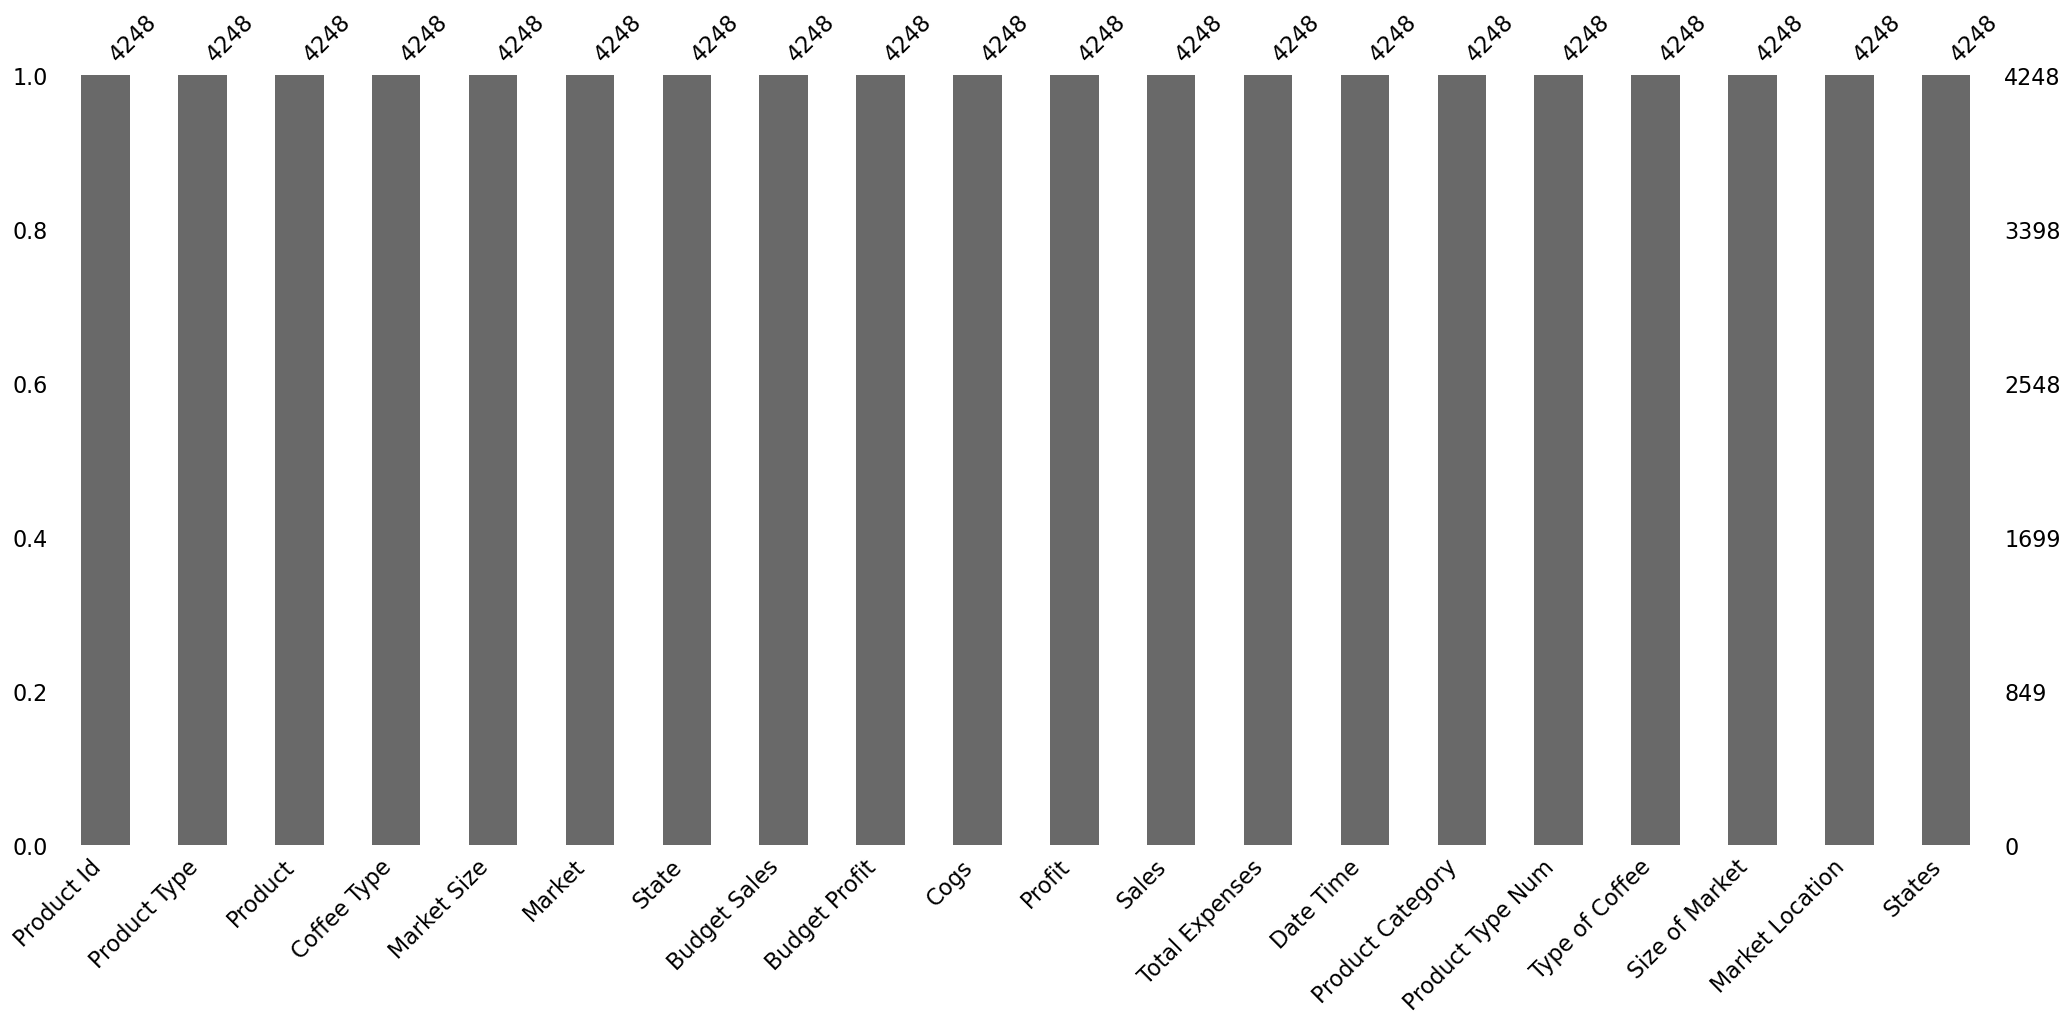

In [83]:
# missingno bar (missing values) null values
missingno.bar(df);

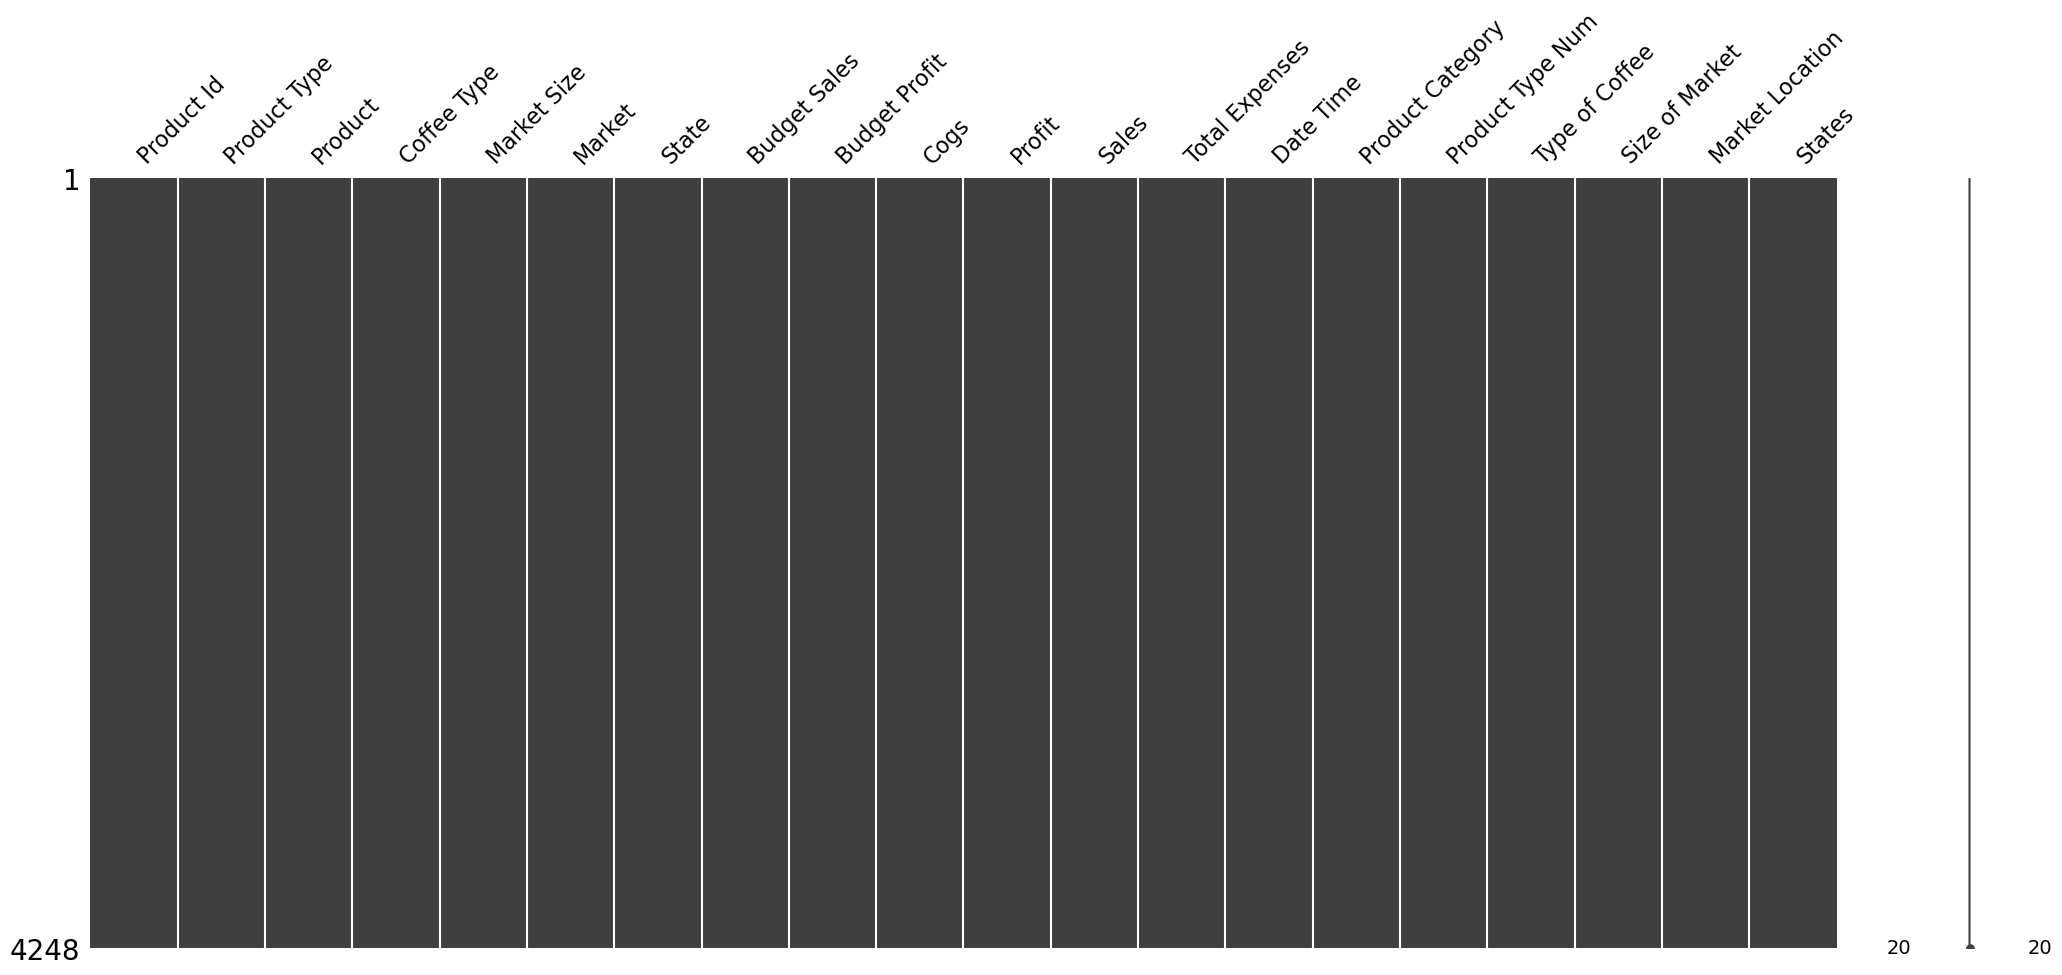

In [84]:
# missingno matrix
missingno.matrix(df);

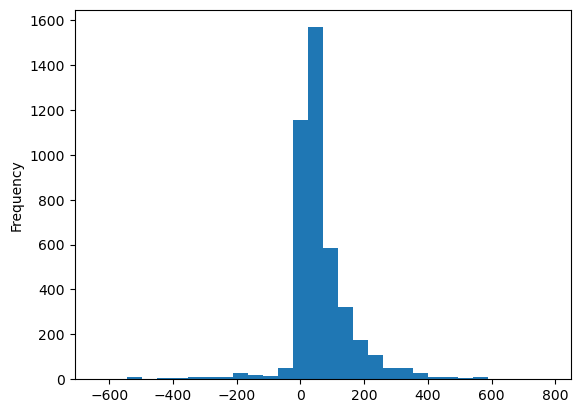

In [85]:
# Histogram
df['Profit'].plot.hist(bins = 30);

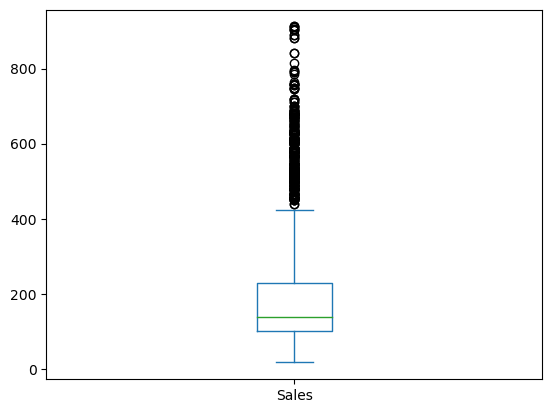

In [86]:
df['Sales'].plot.box();

In [87]:
df['Profit'][:10]

0     94
1     68
2    101
3     30
4     54
5     53
6     99
7      0
8     33
9     17
Name: Profit, dtype: int64

In [88]:
df['Profit'].median()

40.0

In [89]:
#Puts grid on the back of graph
sns.set_theme()

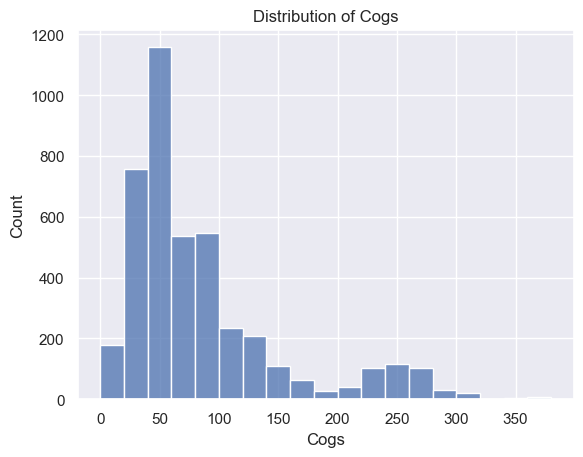

In [90]:
# Histogram
sns.histplot(data = df,
            x ='Cogs',
            bins = 20,
            binwidth = 20,
            color = 'b',)
plt.title('Distribution of Cogs')
plt.xlabel('Cogs');

    50 cogs are more common with a count of almost 1200. Cogs of 300 are least common.   

In [91]:
pd.set_option('display.max_rows',None)

In [92]:
df['Cogs'].value_counts()

Cogs
52     110
54      94
49      88
48      86
43      86
44      78
53      68
0       66
47      66
46      64
34      64
33      64
123     60
50      56
39      56
32      56
63      56
86      54
36      52
59      52
45      52
81      50
29      50
60      48
95      48
35      46
83      46
20      44
104     42
23      42
40      42
75      40
94      40
72      40
51      40
18      40
55      38
41      38
21      38
84      38
25      36
239     36
260     36
65      36
88      34
58      34
68      34
22      34
67      34
77      34
80      32
62      32
64      32
76      32
57      32
38      30
37      30
61      30
154     28
162     28
31      28
228     28
28      28
78      28
92      26
100     26
30      26
114     24
127     24
121     24
69      24
24      24
87      22
19      22
82      22
125     22
91      22
99      22
56      20
85      20
266     20
16      20
113     18
116     18
118     18
89      18
245     18
79      18
145     16
234     16
141  

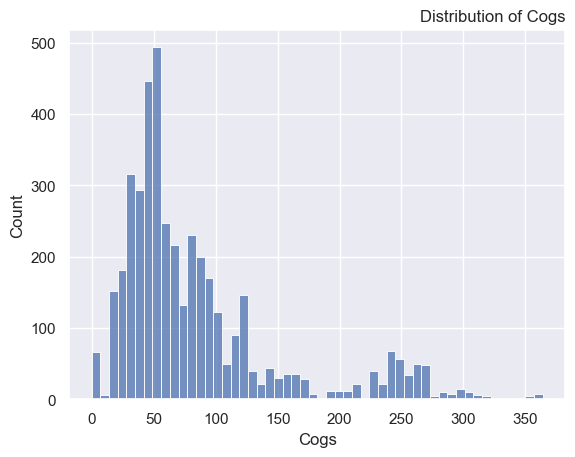

In [93]:
# Can move The title to the right of the hisogram
sns.histplot(data = df,
             x ='Cogs')
plt.title('Distribution of Cogs', loc = 'right')
plt.xlabel('Cogs')
plt.ylabel;('Count');

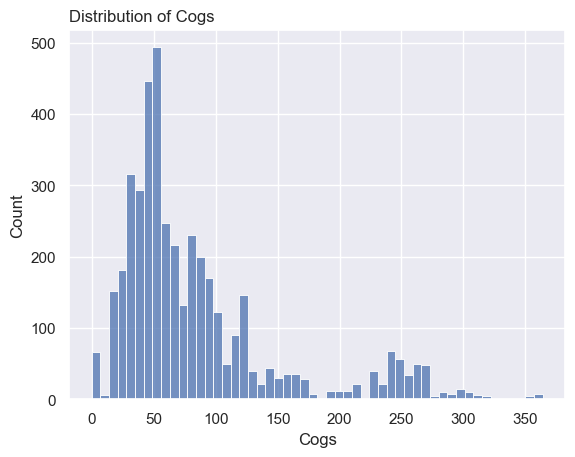

In [94]:
# Can move the title to the left of the histogram
sns.histplot(data = df,
             x = 'Cogs')
plt.title('Distribution of Cogs', loc = 'left')
plt.xlabel('Cogs')
plt.ylabel('Count');

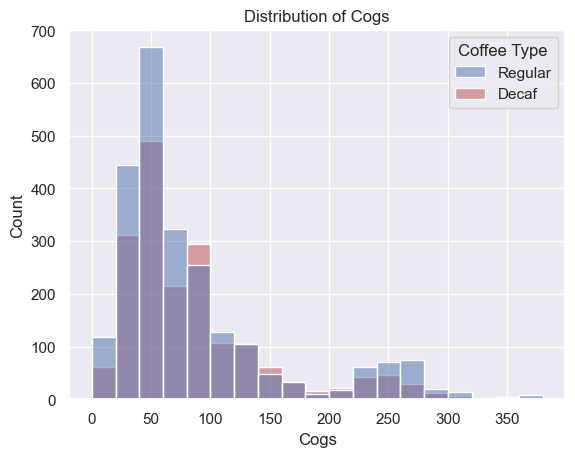

In [95]:
# Setting a theme
# Histogram of cogs by product type

sns.histplot(data = df,
           x = 'Cogs',
             bins = 20,
             binwidth = 20,
           hue = 'Coffee Type',
           palette = ['b', 'r'])
plt.title('Distribution of Cogs')
plt.xlabel('Cogs')
plt.ylabel('Count');

> Looking at the histogram overlaid. It is evident that Regular coffee is typically more common in comparison to Decaf coffee. 

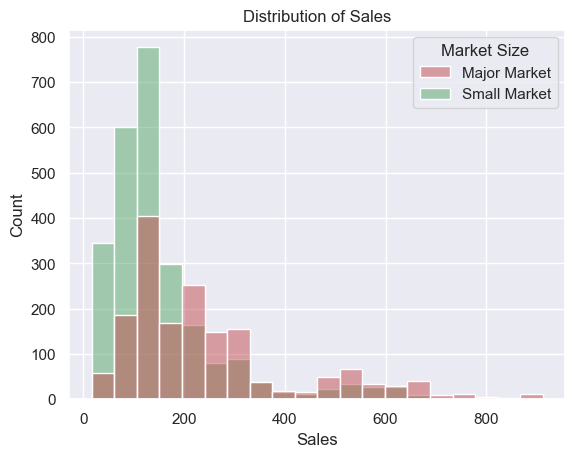

In [96]:
# Create a histogram that looks at sales and market size
sns.histplot(data = df,
             x = 'Sales',
             bins = 20,
             color = 'r',
             hue = 'Market Size',
             palette = ['r', 'g'])
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.savefig('histogram1.png');

> Looking at the histogram the major market has typically more sales compared to the small market. The small market has less sales but is more common. 

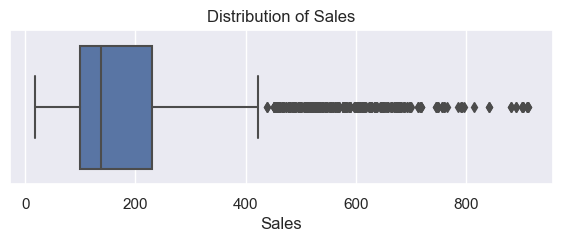

In [97]:
# Box plot of 
plt.figure(figsize = (7,2))
sns.boxplot(data = df,
            x = 'Sales')
plt.title('Distribution of Sales')
plt.xlabel('Sales');

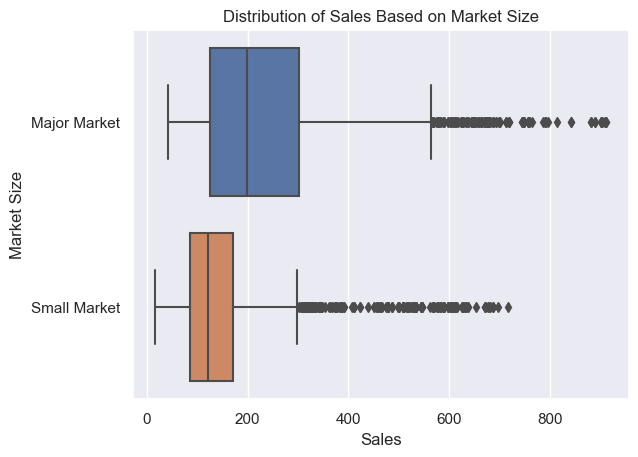

In [98]:
# Box plot of sales by market size
sns.boxplot(data = df,
            x = 'Sales',
            y = 'Market Size')
plt.title('Distribution of Sales Based on Market Size')
plt.xlabel('Sales')
plt.ylabel('Market Size');

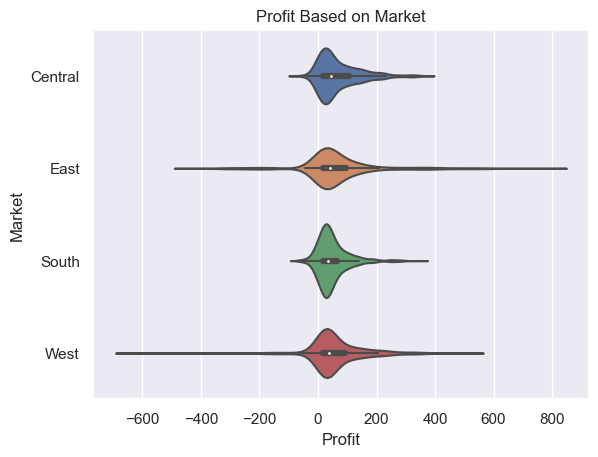

In [99]:
# Violin Plot of profit and market
sns.violinplot(data = df,
               x = 'Profit',
               y = 'Market')
plt.title('Profit Based on Market')
plt.xlabel('Profit')
plt.ylabel('Market');

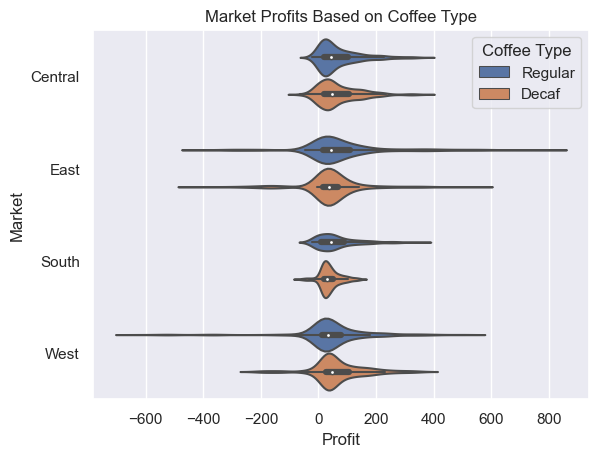

In [100]:
sns.violinplot(data = df,
               x = 'Profit',
               y = 'Market',
               hue = 'Coffee Type')
plt.title('Market Profits Based on Coffee Type')
plt.xlabel('Profit')
plt.ylabel('Market');

In [101]:
df.groupby('Market')['Profit'].mean()

Market
Central    69.830357
East       66.685811
South      48.330357
West       55.056548
Name: Profit, dtype: float64

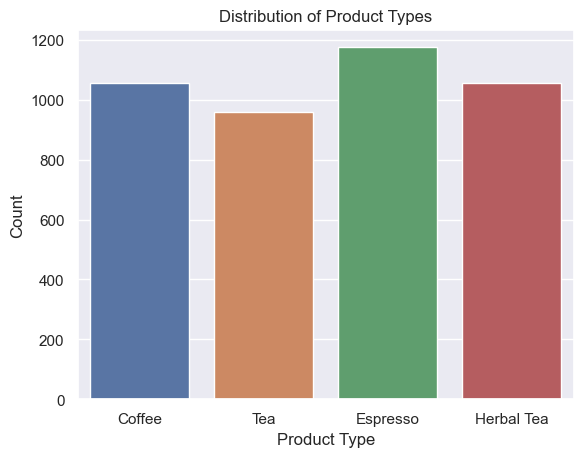

In [102]:
# Count Plot
sns.countplot(data = df,
              x = 'Product Type')
plt.title('Distribution of Product Types')
plt.xlabel('Product Type')
plt.ylabel('Count');

> The most common product type is Espresso having a count of almost 1200. Herbal Tea and Coffee have similiar counts. Tea sis the least common with a count of almost 1000.

In [103]:
df['Product Type'].value_counts().index

Index(['Espresso', 'Coffee', 'Herbal Tea', 'Tea'], dtype='object', name='Product Type')

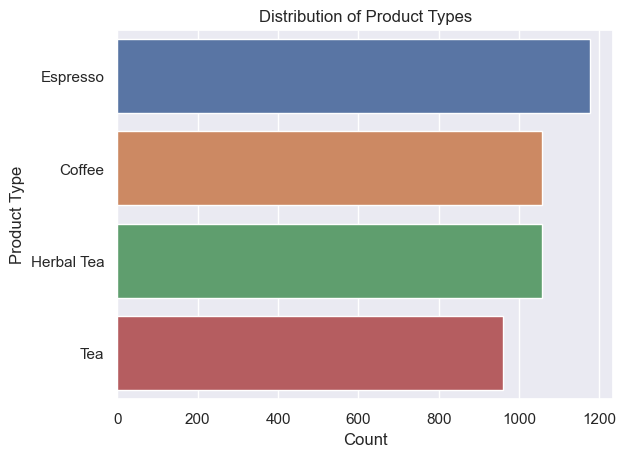

In [104]:
# Horizonatl count plot in order
sns.countplot(data = df,
              y = 'Product Type',
              order = df['Product Type'].value_counts().index)
plt.title('Distribution of Product Types')
plt.xlabel('Count')
plt.ylabel('Product Type');

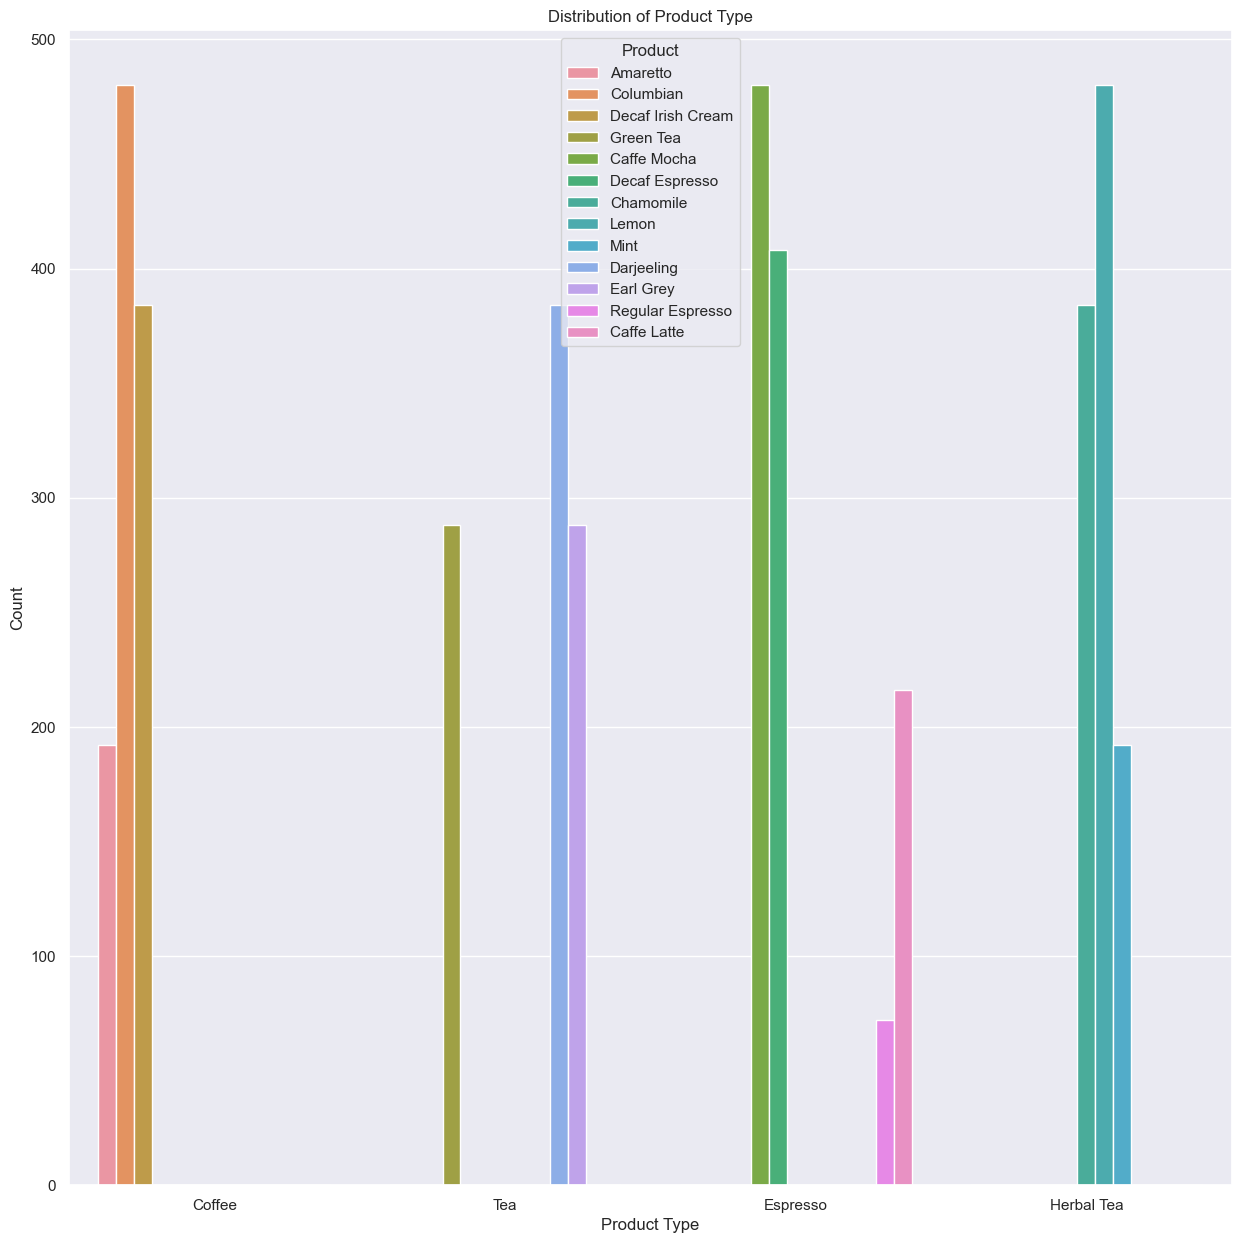

In [105]:
plt.figure(figsize = (15,15))
sns.countplot(data = df,
              x = 'Product Type',
              hue = 'Product')
plt.title('Distribution of Product Type')
plt.xlabel('Product Type')
plt.ylabel('Count');

> The four Product Types are Coffee, Tea, Espresso and Herbal Tea. The most common product for Coffee is Columbian and the least common is is Amaretto. For Tea the most common product is Darjeeling and ear Grey and Green Tea are similar and are the least common. For Espresso Caffe Mocha is the most common while Regular Espresso is the least. For Herbal Tea  Lemon i the most common while Mint is the least common. 

In [106]:
df['Product'].value_counts()

Product
Columbian            480
Caffe Mocha          480
Lemon                480
Decaf Espresso       408
Decaf Irish Cream    384
Chamomile            384
Darjeeling           384
Green Tea            288
Earl Grey            288
Caffe Latte          216
Amaretto             192
Mint                 192
Regular Espresso      72
Name: count, dtype: int64

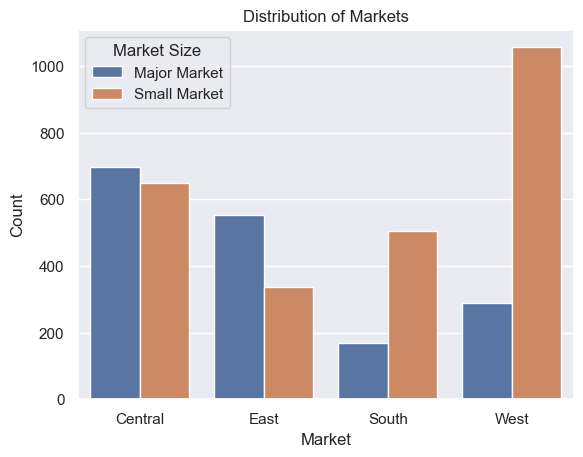

In [107]:
sns.countplot(data = df,
              x = 'Market',
              hue = 'Market Size')
plt.title('Distribution of Markets')
plt.xlabel('Market')
plt.ylabel('Count');

 The small market is most common in the west out of the four markets. The major market is most common in the central market compared to the other markets. 

In [108]:
df.groupby('Market')['Market Size'].value_counts()

Market   Market Size 
Central  Major Market     696
         Small Market     648
East     Major Market     552
         Small Market     336
South    Small Market     504
         Major Market     168
West     Small Market    1056
         Major Market     288
Name: count, dtype: int64

Text(0, 0.5, 'Budget Sales')

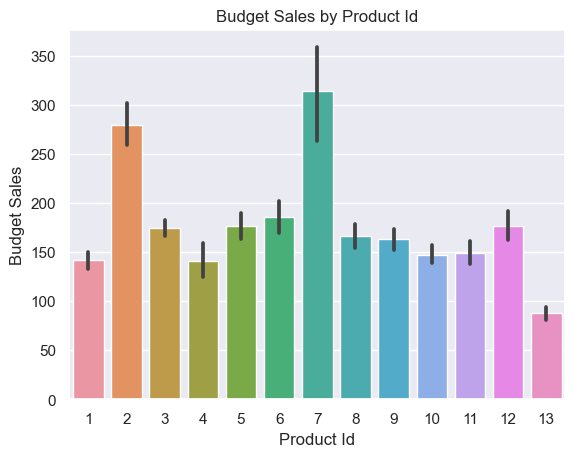

In [109]:
# Bar plot of dat and coffee type
sns.barplot(data = df,
            x = 'Product Id',
            y = 'Budget Sales')
plt.title('Budget Sales by Product Id')
plt.xlabel('Product Id')
plt.ylabel('Budget Sales')

Product ID 7 is the most common while product id 2 is the second most common and product 13 is the least common. 

In [110]:
df.groupby('Product Id')['Budget Sales'].value_counts()

Product Id  Budget Sales
1           130             30
            110             20
            120             18
            140             16
            40              12
            150             12
            160             10
            100              8
            170              8
            200              8
            60               6
            180              6
            310              4
            280              4
            220              4
            90               4
            50               4
            260              4
            30               2
            80               2
            210              2
            230              2
            250              2
            290              2
            300              2
2           140             32
            190             28
            120             26
            100             26
            110             22
            90              22
            23

In [111]:
df.groupby('Product Id')['Product'].value_counts()

Product Id  Product          
1           Amaretto             192
2           Columbian            480
3           Decaf Irish Cream    384
4           Caffe Latte          216
5           Caffe Mocha          480
6           Decaf Espresso       408
7           Regular Espresso      72
8           Chamomile            384
9           Lemon                480
10          Mint                 192
11          Darjeeling           384
12          Earl Grey            288
13          Green Tea            288
Name: count, dtype: int64

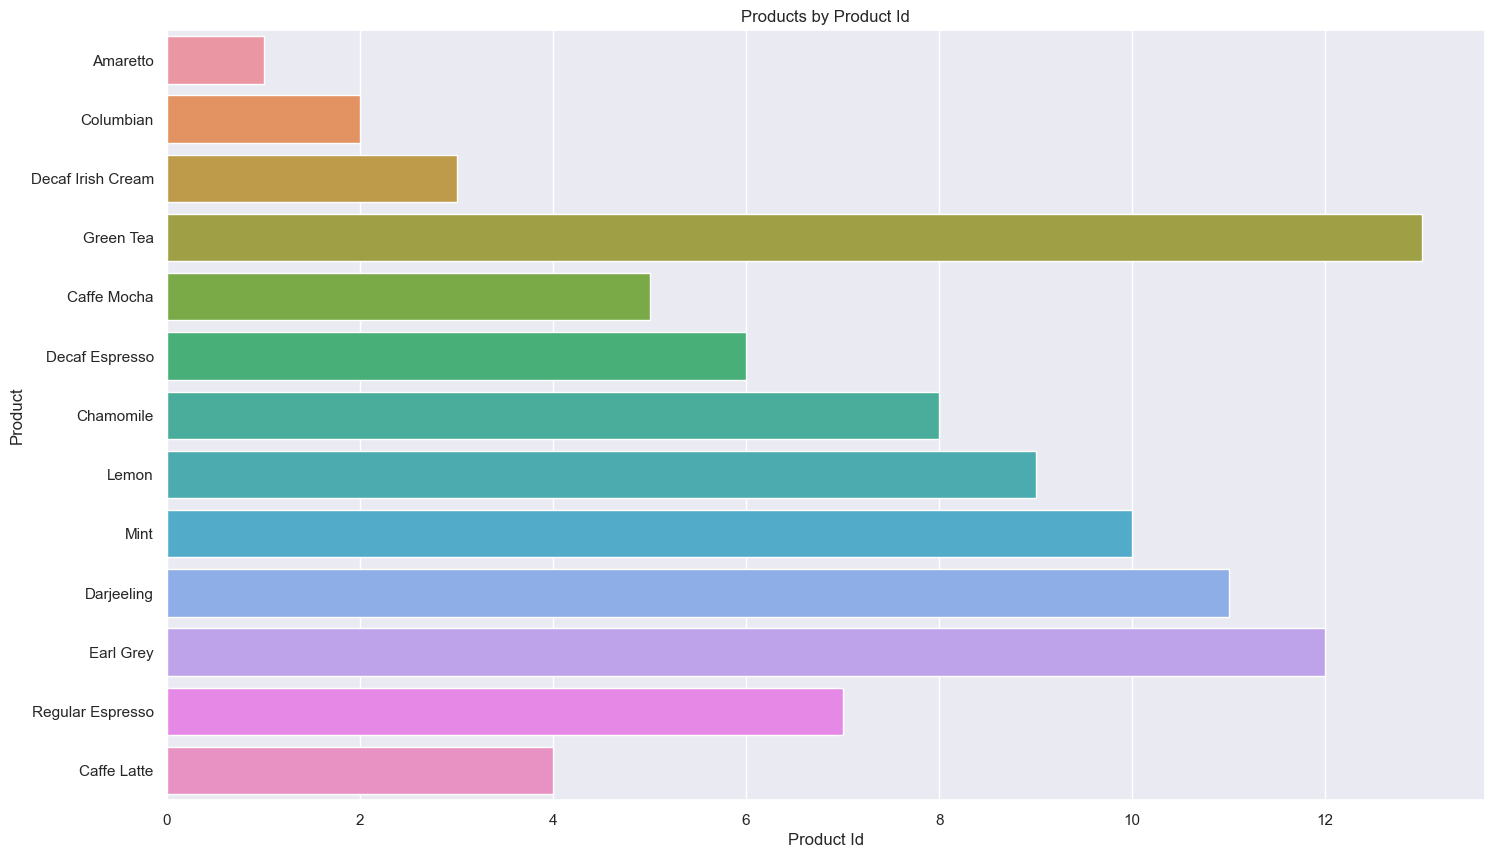

In [112]:
plt.figure(figsize = (17,10))
sns.barplot(data = df,
            y = 'Product',
            x = 'Product Id')
plt.title('Products by Product Id')
plt.xlabel('Product Id')
plt.ylabel('Product');

The above graph shows the products and the product id's they are associated with. 

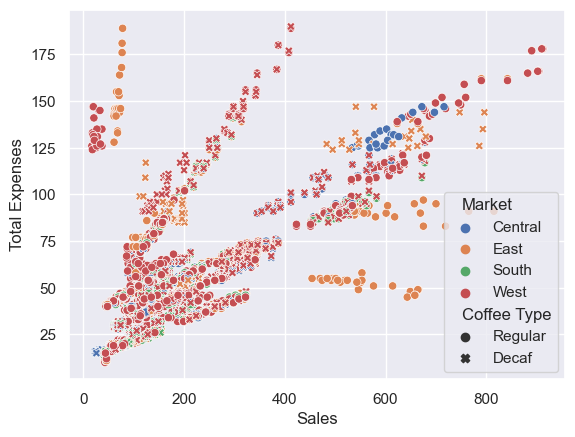

In [113]:
# Scatterplot of sales and total expenses
sns.scatterplot(data = df,
                x = 'Sales',
                y = 'Total Expenses',
style = 'Coffee Type', hue = 'Market');

Regular coffee in the west has the highest sales. Regular coffee in the East has the most in total expenses. The product with the least in total expenses and sales is the  is the Central decaf. 

In [114]:
#Pair Plots

C:\Users\alish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


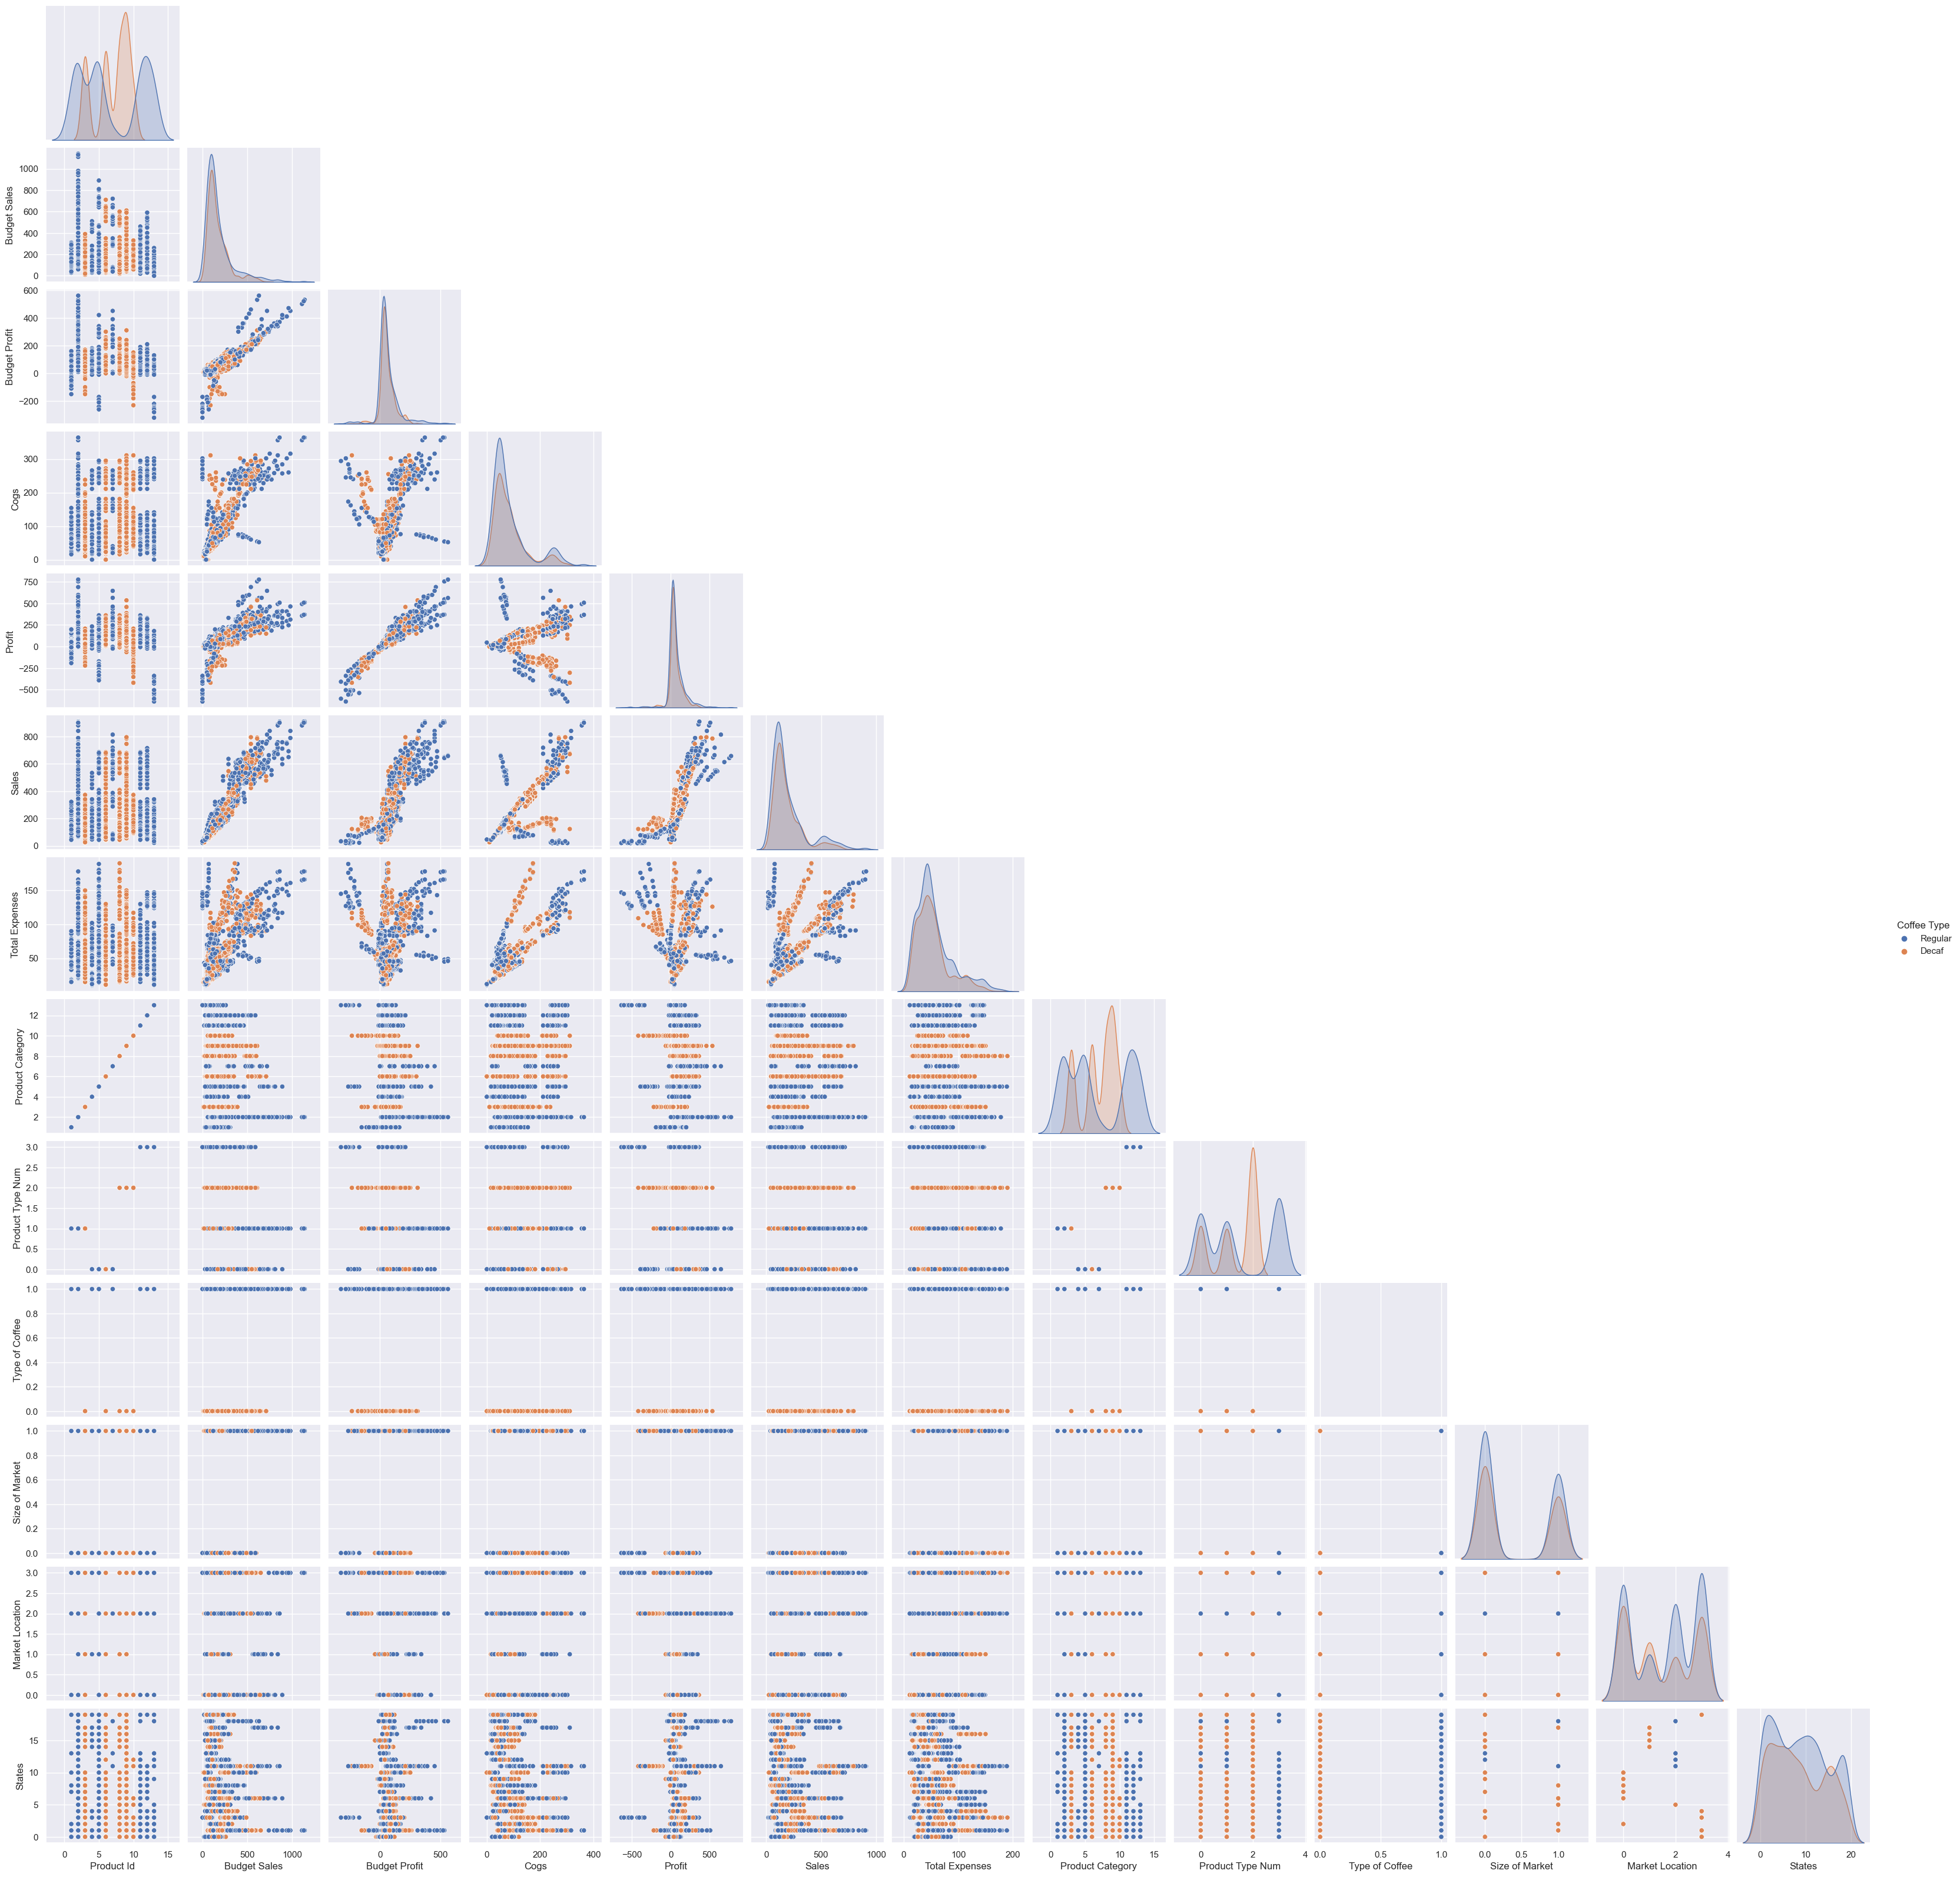

In [115]:
sns.pairplot(data = df,
             corner = True,
             hue = 'Coffee Type');

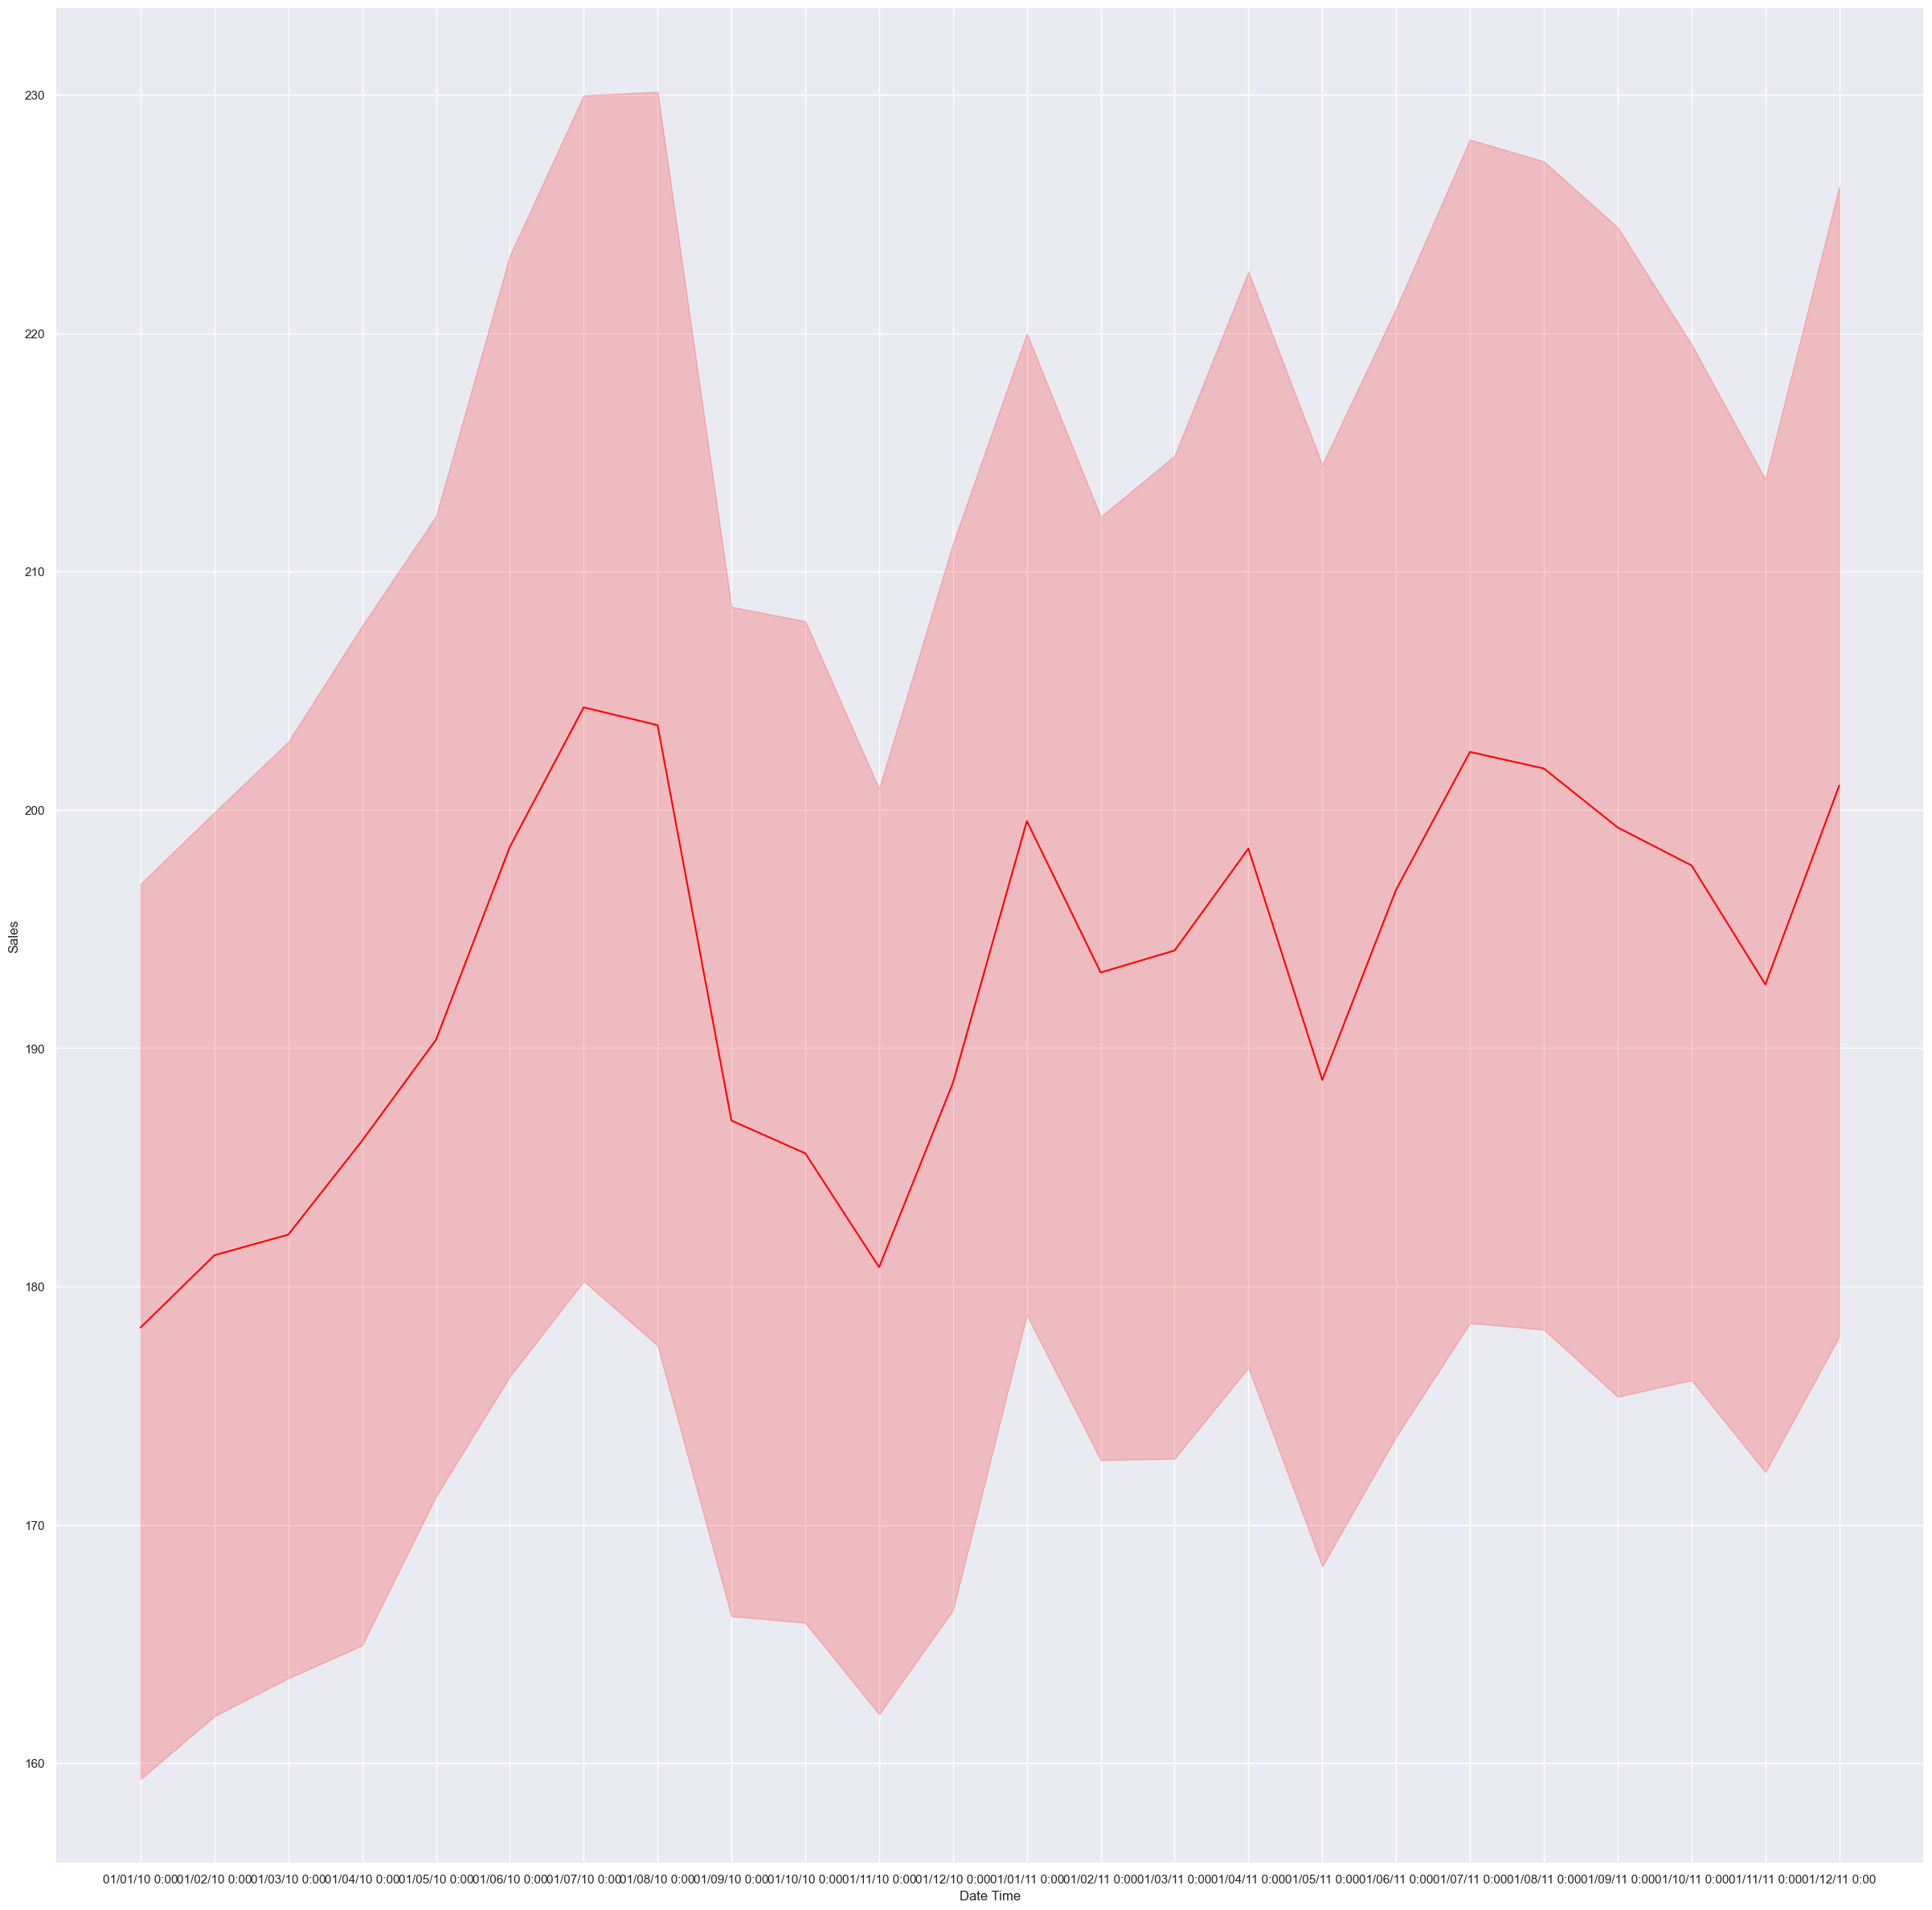

In [116]:
# Line plot of date and Sale
plt.figure(figsize = (30,30))
sns.lineplot(data = df,
             x = 'Date Time',
             y = 'Sales',
             color = 'red');

In [117]:
# Heatmap
df.corr(numeric_only = True)

Product Id  Budget Sales  Budget Profit      Cogs    Profit  \
Product Id          1.000000     -0.178730      -0.147758  0.002142 -0.058693   
Budget Sales       -0.178730      1.000000       0.848285  0.849901  0.758830   
Budget Profit      -0.147758      0.848285       1.000000  0.514967  0.937606   
Cogs                0.002142      0.849901       0.514967  1.000000  0.464838   
Profit             -0.058693      0.758830       0.937606  0.464838  1.000000   
Sales              -0.048077      0.956538       0.815435  0.886651  0.797331   
Total Expenses     -0.073369      0.661217       0.255811  0.782534  0.199976   
Product Category    1.000000     -0.178730      -0.147758  0.002142 -0.058693   
Product Type Num    0.778632     -0.130109      -0.090817  0.000508 -0.019401   
Type of Coffee     -0.023953      0.036299       0.031808  0.002376  0.028778   
Size of Market      0.056705      0.325756       0.266809  0.296596  0.243817   
Market Location     0.070801     -0.006565      -0.055401  0.073701 -0.043281   
States             -0.090377     -0.103346      -0.022038 -0.162167 -0.017367   

                     Sales  Total Expenses  Product Category  \
Product Id       -0.048077       -0.073369          1.000000   
Budget Sales      0.956538        0.661217         -0.178730   
Budget Profit     0.815435        0.255811         -0.147758   
Cogs              0.886651        0.782534          0.002142   
Profit            0.797331        0.199976         -0.058693   
Sales             1.000000        0.689350         -0.048077   
Total Expenses    0.689350        1.000000         -0.073369   
Product Category -0.048077       -0.073369          1.000000   
Product Type Num -0.024543       -0.062902          0.778632   
Type of Coffee    0.028333        0.050237         -0.023953   
Size of Market    0.306042        0.156724          0.056705   
Market Location   0.034566        0.114927          0.070801   
States           -0.111314       -0.126687         -0.090377   

                  Product Type Num  Type of Coffee  Size of Market  \
Product Id                0.778632       -0.023953        0.056705   
Budget Sales             -0.130109        0.036299        0.325756   
Budget Profit            -0.090817        0.031808        0.266809   
Cogs                      0.000508        0.002376        0.296596   
Profit                   -0.019401        0.028778        0.243817   
Sales                    -0.024543        0.028333        0.306042   
Total Expenses           -0.062902        0.050237        0.156724   
Product Category          0.778632       -0.023953        0.056705   
Product Type Num          1.000000        0.057361        0.050680   
Type of Coffee            0.057361        1.000000       -0.002627   
Size of Market            0.050680       -0.002627        1.000000   
Market Location           0.031177        0.078309       -0.180800   
States                   -0.119309        0.026697       -0.179575   

                  Market Location    States  
Product Id               0.070801 -0.090377  
Budget Sales            -0.006565 -0.103346  
Budget Profit           -0.055401 -0.022038  
Cogs                     0.073701 -0.162167  
Profit                  -0.043281 -0.017367  
Sales                    0.034566 -0.111314  
Total Expenses           0.114927 -0.126687  
Product Category         0.070801 -0.090377  
Product Type Num         0.031177 -0.119309  
Type of Coffee           0.078309  0.026697  
Size of Market          -0.180800 -0.179575  
Market Location          1.000000 -0.139563  
States                  -0.139563  1.000000

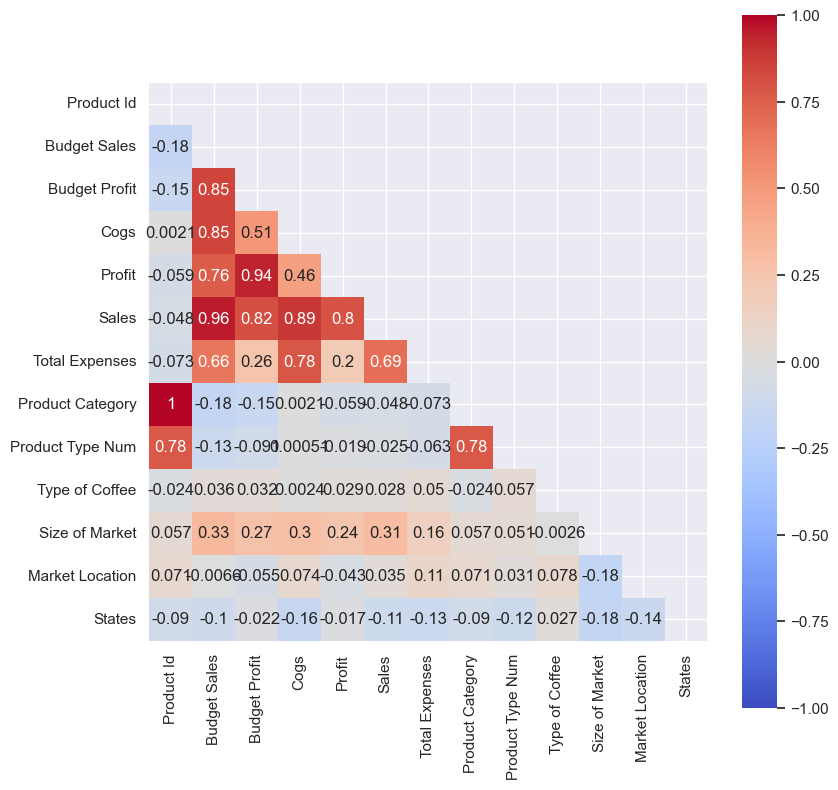

In [118]:
plt.figure(figsize = (9,9))
corr = df.corr(numeric_only = True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,
            mask = mask,
            square = True,
            cmap = 'coolwarm',
            annot = True,
            vmin = -1,
            vmax = 1);

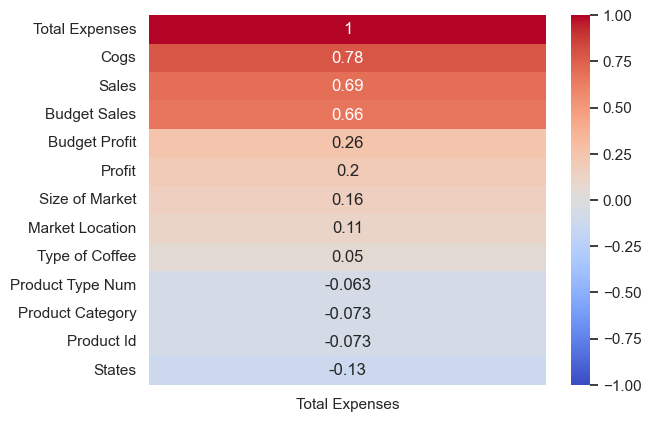

In [119]:
sns.heatmap(df.corr(numeric_only = True)[['Total Expenses']].sort_values(by = 'Total Expenses', ascending = False),
                                                                         annot = True,
                                                                         cmap = 'coolwarm',
                                                                         vmin = -1,
                                                                         vmax = 1);

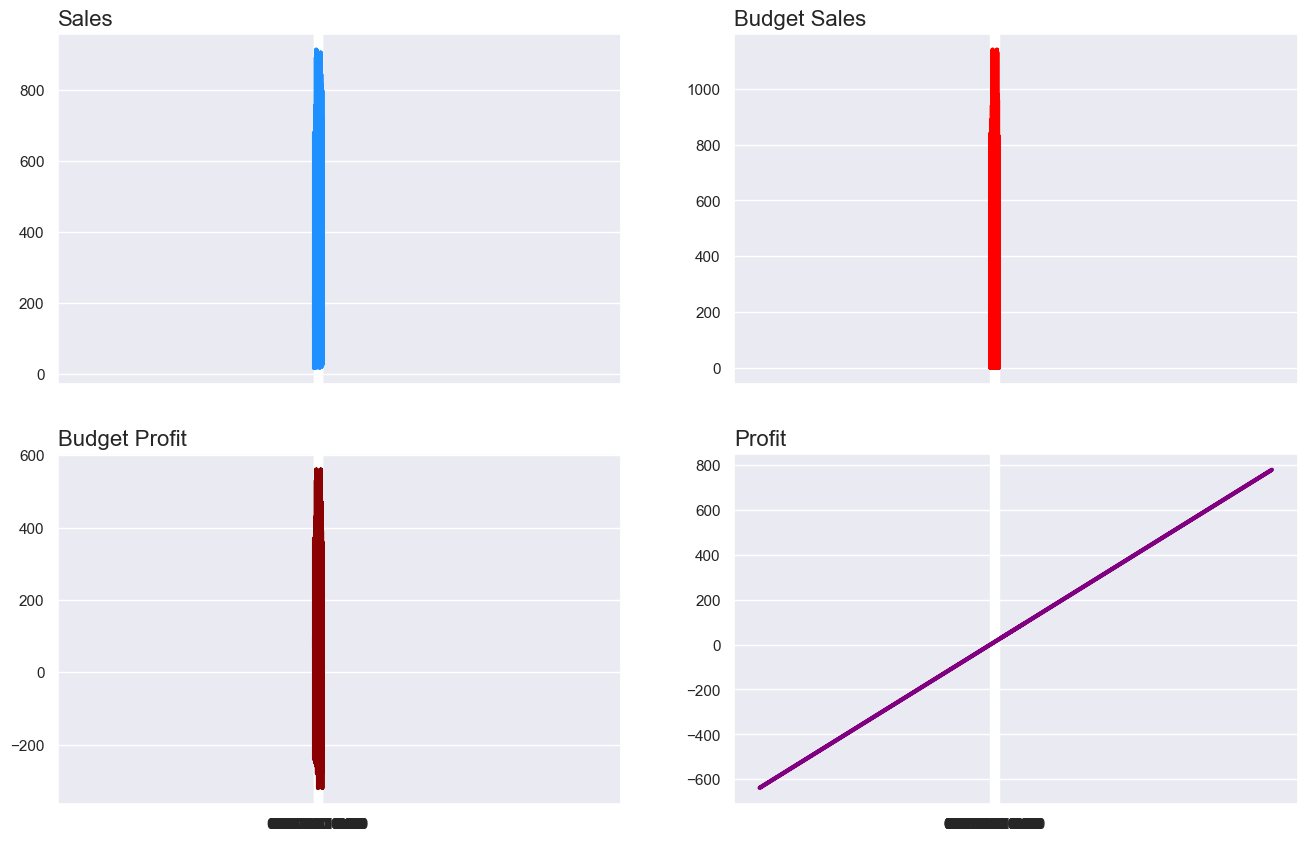

In [120]:
# Use subplots to easily compare multiple visualizations by sharing an axis
# Create figure and list axes 
fig, axs = plt.subplots(2,2, figsize = (16,10), sharex = True)
axs[0][0].plot(df['Date Time'],df['Sales'], color = 'dodgerblue', linewidth = 3)
axs[0][0].set_title('Sales', size = 16, loc = 'left')

axs[0][1].plot(df['Date Time'],df['Budget Sales'], color = 'red', linewidth = 3)
axs[0][1].set_title('Budget Sales', size = 16, loc = 'left')

axs[1][0].plot(df['Date Time'], df['Budget Profit'], color = 'darkred', linewidth = 3)
axs[1][0].set_title('Budget Profit', size = 16, loc = 'left')

axs[1][1].plot(df['Profit'], df ['Profit'], color = 'purple', linewidth = 3)
axs[1][1].set_title('Profit', size = 16, loc = 'left'); 

In [121]:
df ['Is Decafe'] = df ['Coffee Type'].apply(lambda x : 1 if 'Decafe' in x else 0)

In [122]:
df.head()

Product Id Product Type            Product Coffee Type   Market Size  \
0           1       Coffee           Amaretto     Regular  Major Market   
1           2       Coffee          Columbian     Regular  Major Market   
2           3       Coffee  Decaf Irish Cream       Decaf  Major Market   
3          13          Tea          Green Tea     Regular  Major Market   
4           5     Espresso        Caffe Mocha     Regular  Major Market   

    Market     State  Budget Sales  Budget Profit  Cogs  ...  Sales  \
0  Central  Colorado           220            100    89  ...    219   
1  Central  Colorado           190             80    83  ...    190   
2  Central  Colorado           240            110    95  ...    234   
3  Central  Colorado            80             30    44  ...    100   
4  Central  Colorado           150             70    54  ...    134   

   Total Expenses      Date Time Product Category  Product Type Num  \
0              36  01/01/10 0:00                1                 1   
1              39  01/01/10 0:00                2                 1   
2              38  01/01/10 0:00                3                 1   
3              26  01/01/10 0:00               13                 3   
4              26  01/01/10 0:00                5                 0   

   Type of Coffee  Size of Market  Market Location  States  Is Decafe  
0               1               1                0       2          0  
1               1               1                0       2          0  
2               0               1                0       2          0  
3               1               1                0       2          0  
4               1               1                0       2          0  

[5 rows x 21 columns]

In [123]:
df.head()

Product Id Product Type            Product Coffee Type   Market Size  \
0           1       Coffee           Amaretto     Regular  Major Market   
1           2       Coffee          Columbian     Regular  Major Market   
2           3       Coffee  Decaf Irish Cream       Decaf  Major Market   
3          13          Tea          Green Tea     Regular  Major Market   
4           5     Espresso        Caffe Mocha     Regular  Major Market   

    Market     State  Budget Sales  Budget Profit  Cogs  ...  Sales  \
0  Central  Colorado           220            100    89  ...    219   
1  Central  Colorado           190             80    83  ...    190   
2  Central  Colorado           240            110    95  ...    234   
3  Central  Colorado            80             30    44  ...    100   
4  Central  Colorado           150             70    54  ...    134   

   Total Expenses      Date Time Product Category  Product Type Num  \
0              36  01/01/10 0:00                1                 1   
1              39  01/01/10 0:00                2                 1   
2              38  01/01/10 0:00                3                 1   
3              26  01/01/10 0:00               13                 3   
4              26  01/01/10 0:00                5                 0   

   Type of Coffee  Size of Market  Market Location  States  Is Decafe  
0               1               1                0       2          0  
1               1               1                0       2          0  
2               0               1                0       2          0  
3               1               1                0       2          0  
4               1               1                0       2          0  

[5 rows x 21 columns]

In [124]:
# How many decafe in state
df.groupby(['Is Decafe','State'])['Is Decafe'].agg(['count'])

count
Is Decafe State               
0         California       288
          Colorado         264
          Connecticut      168
          Florida          216
          Illinois         216
          Iowa             216
          Louisiana        168
          Massachusetts    144
          Missouri         216
          Nevada           264
          New Hampshire    168
          New Mexico       168
          New York         192
          Ohio             216
          Oklahoma         168
          Oregon           264
          Texas            168
          Utah             288
          Washington       240
          Wisconsin        216

In [125]:
# Linear Regression
# Feature Engineering
df['State'].value_counts()


State
Utah             288
California       288
Colorado         264
Oregon           264
Nevada           264
Washington       240
Florida          216
Illinois         216
Wisconsin        216
Ohio             216
Missouri         216
Iowa             216
New York         192
Connecticut      168
New Hampshire    168
Louisiana        168
New Mexico       168
Oklahoma         168
Texas            168
Massachusetts    144
Name: count, dtype: int64

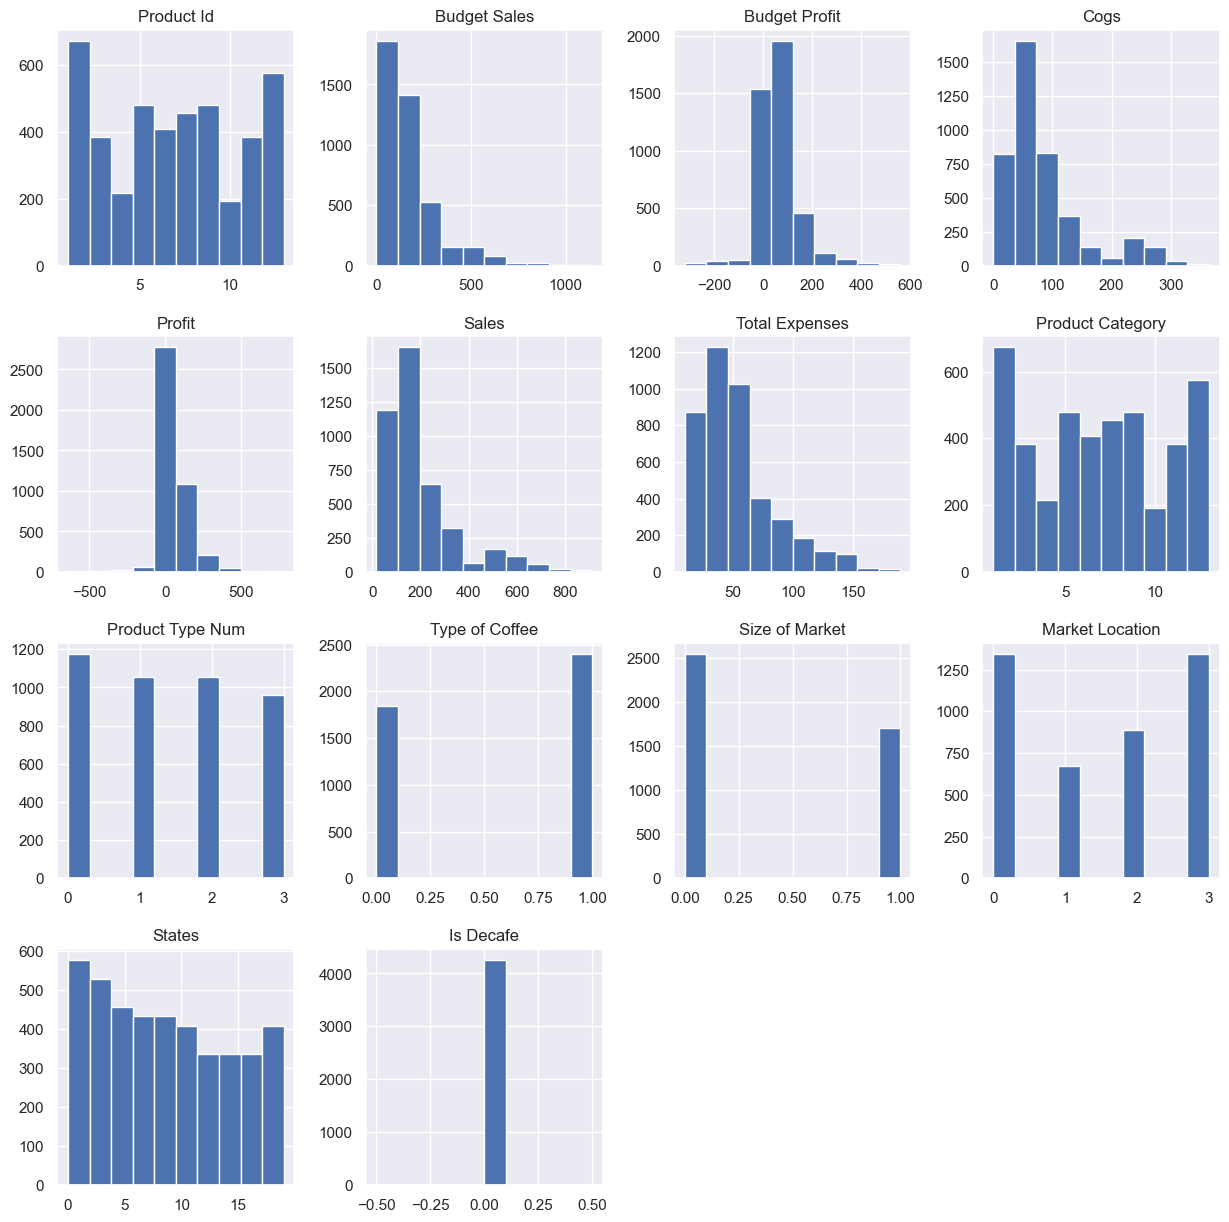

In [126]:
# Create Histograms of All Numerical Columns
df.hist(figsize = (15,15));

C:\Users\alish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


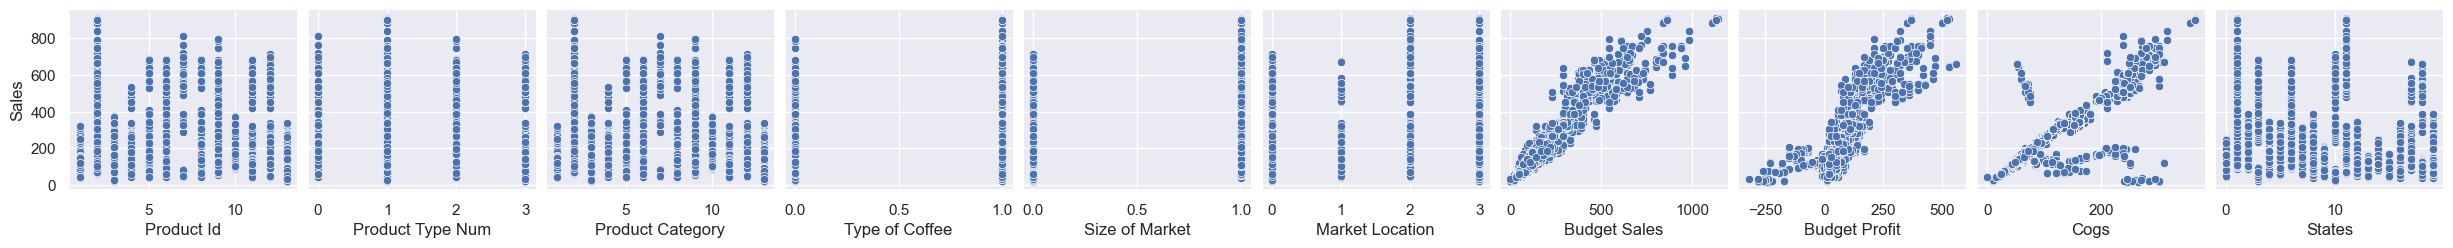

In [137]:

sns.pairplot(df, x_vars=['Product Id', 'Product Type Num', 'Product Category', 'Type of Coffee', 'Size of Market', 'Market Location', 'Budget Sales', 'Budget Profit', 'Cogs', 'States'], y_vars=['Sales']);

In [138]:
# Creating features matrix (x) and target vector (y) making the target the sales
features = ['Product Id', 'Product Type Num', 'Product Category', 'Type of Coffee', 'Size of Market', 'Market Location', 'Budget Sales', 'Budget Profit', 'Cogs','States']
X = df[features]
y = df['Sales']


In [139]:
X.columns

Index(['Product Id', 'Product Type Num', 'Product Category', 'Type of Coffee',
       'Size of Market', 'Market Location', 'Budget Sales', 'Budget Profit',
       'Cogs', 'States'],
      dtype='object')

In [140]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [141]:
X_train.shape

(3186, 10)

In [142]:
X_test.shape

(1062, 10)

In [143]:
y_train.shape

(3186,)

In [144]:
y_test.shape

(1062,)

In [145]:
# Model Prep: Instatniate and Fit The Model
lr=LinearRegression()

In [146]:
lr.fit(X_train, y_train)

LinearRegression()

In [147]:
# Evaluate
# Training R2 Score:
lr.score(X_train, y_train)

0.9636579301686871

In [148]:
# Testing R2 Score:
lr.score(X_test, y_test)

0.9604821030387901

9604% of the variablility in out model can be explained by the features in our model.

In [149]:
# RMSE Score
# use the mean squared error to evaluate the RMSE score

In [150]:
# predictions on training set
train_preds = lr.predict(X_train)

In [151]:
# predictions on test set
test_preds = lr.predict = lr.predict(X_test)

In [152]:
# Calculate RMSE on training set
mean_squared_error(y_train, train_preds, squared = False)

29.30087258988266

In [153]:
# Calculate RMSE on test set
mean_squared_error(y_test, test_preds, squared = False)

28.421552583073737

In [156]:
# Evaluation
# Calculate the mean of the target in the test group
y_test.mean()

188.18738229755178

In [155]:
np.full_like(y_test, y_test.mean(), dtype = float)

array([188.1873823, 188.1873823, 188.1873823, ..., 188.1873823,
       188.1873823, 188.1873823])

In [157]:
# Calculate the baseline RMSE
mean_squared_error(y_test, np.full_like(y_test, y_test.mean(), dtype = float), squared = False)

142.9719650093916

The evaluation of the regression model against a baseline reveals its superior predictive performance. The models achieved a test RMSE of 29 and is considerably lower than the baseline RMSE of 142. This substantial difference in RMSE scores underscores the effectiveness of the model in providing more accurate and precise predictions compared to a simple baseline strategy; highlighting its value in capturing the underlying patterns within the data. 

In [158]:
# Coefficients
lr.coef_

array([ 0.75311793,  0.31032185,  0.75311793,  2.14107013, -4.08853523,
        1.64820187,  0.14206694,  0.81954996,  1.24022647,  0.09377543])

In [160]:
list(zip(lr.feature_names_in_, lr.coef_))

[('Product Id', 0.7531179348849325),
 ('Product Type Num', 0.3103218528691892),
 ('Product Category', 0.7531179348849147),
 ('Type of Coffee', 2.1410701314606784),
 ('Size of Market', -4.0885352327577635),
 ('Market Location', 1.648201873639836),
 ('Budget Sales', 0.14206693909194798),
 ('Budget Profit', 0.8195499636476334),
 ('Cogs', 1.2402264717063474),
 ('States', 0.09377542915906971)]